In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import rcParams
import os
import zipfile

# 1. Mount Google Drive
from google.colab import drive
import os

# Check if drive is already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive is already mounted.")

# 2. Specify the path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Font/times-new-roman.zip'  # Replace with your actual path

# 3. Extract the font file from the zip file
extract_dir = '/content/drive/MyDrive/Font'  # Directory to extract the font
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 4. Add the extracted font to Matplotlib's font list
for font in fm.findSystemFonts(fontpaths=[extract_dir]):
    fm.fontManager.addfont(font)

# 5. Set the font family to Times New Roman
plt.style.use('default')  # Reset to default style with white background
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.family'] = 'Times New Roman' # Set legend font size to 18
plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})
# Verify the font name
font_properties = fm.FontProperties(fname=os.path.join(extract_dir, 'times.ttf'))  # Adjust filename if needed
font_name = font_properties.get_name()
print(f"Font name: {font_name}")

Google Drive is already mounted.
Font name: Times New Roman


# Lebah

Starting Honey Analysis Workflow...
Fetching data from API...
Data fetched successfully!
Data filtered to 379 samples.
Preprocessing data...
Classes: ['M-H' 'M-K' 'M-T']
Data preprocessed. Training set: (265, 18), Test set: (114, 18)

Class distribution:
  M-H: 87 (train), 37 (test)
  M-K: 113 (train), 49 (test)
  M-T: 65 (train), 28 (test)

--- Hyperparameter Search: ANN ---
Searching hyperparameters for ANN...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for ANN: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (116, 10), 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.9509

--- Hyperparameter Search: RF ---
Searching hyperparameters for RF...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for RF: {'max_depth': None, 'n_estimators': 300}
Best cross-validated accuracy: 0.9321

--- Hyperparameter Search: SVM ---
Searching hyperparameters for SVM...
Fitting 5 folds for each of 60 candidates, totalling 300 fi

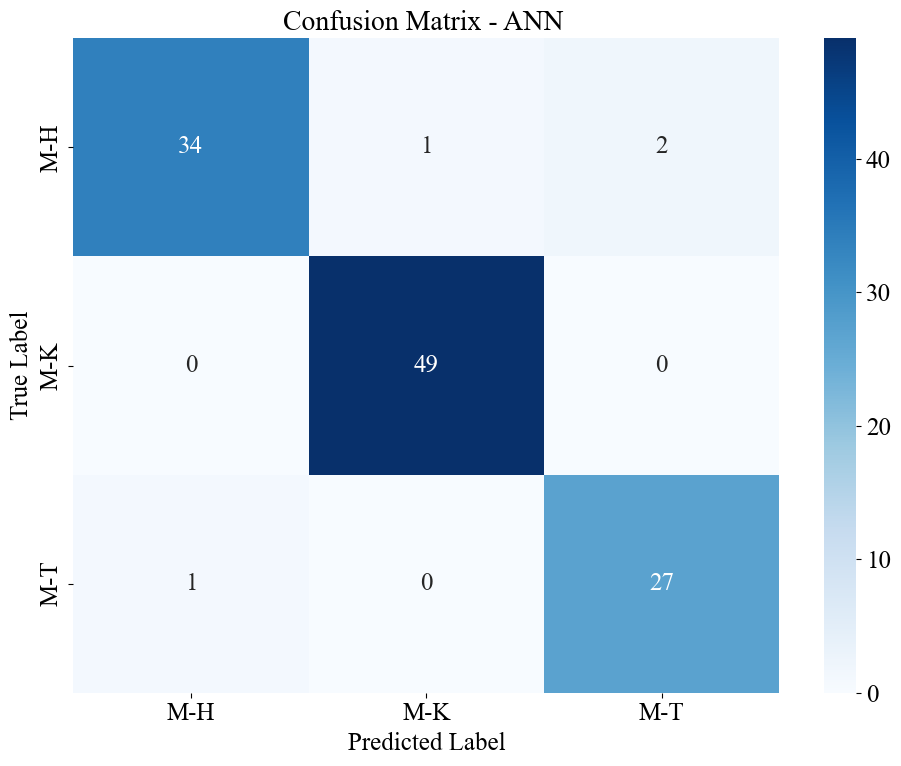


Classification Report (Test Data):
              precision    recall  f1-score     support
M-H            0.971429  0.918919  0.944444   37.000000
M-K            0.980000  1.000000  0.989899   49.000000
M-T            0.931034  0.964286  0.947368   28.000000
accuracy       0.964912  0.964912  0.964912    0.964912
macro avg      0.960821  0.961068  0.960571  114.000000
weighted avg   0.965191  0.964912  0.964700  114.000000

Classification Report (Train Data):
              precision  recall  f1-score  support
M-H                 1.0     1.0       1.0     87.0
M-K                 1.0     1.0       1.0    113.0
M-T                 1.0     1.0       1.0     65.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    265.0
weighted avg        1.0     1.0       1.0    265.0

Evaluating RF model...

Model Performance Comparison:
Metric     Training   Testing   
------------------------------
Accuracy   1.0000     0.9474
Precision  1.0000     0.9547
R

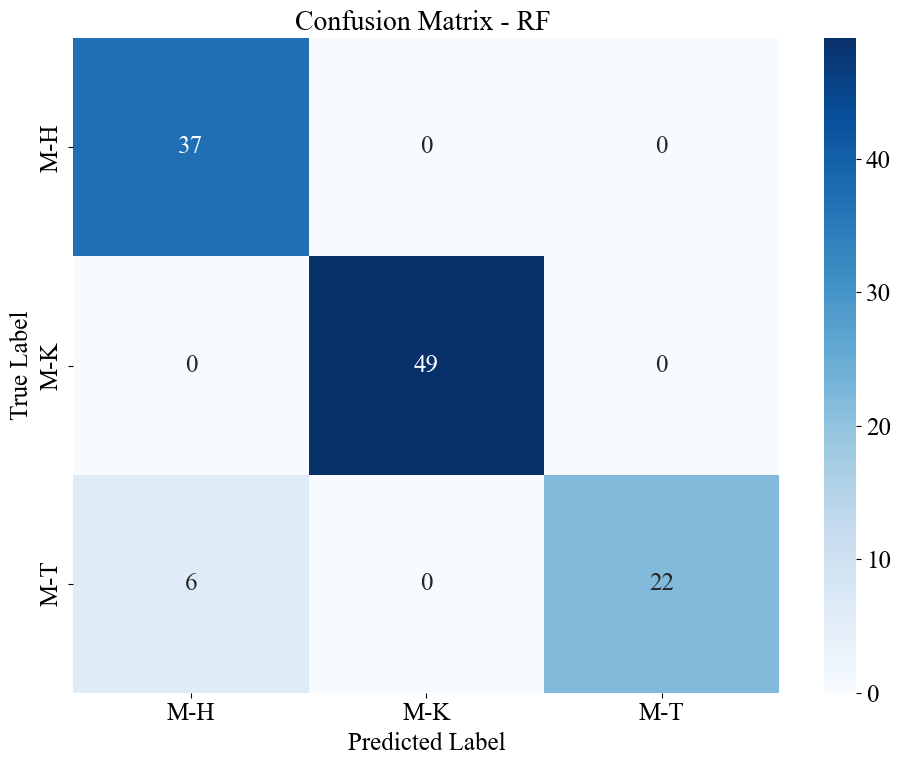


Classification Report (Test Data):
              precision    recall  f1-score     support
M-H            0.860465  1.000000  0.925000   37.000000
M-K            1.000000  1.000000  1.000000   49.000000
M-T            1.000000  0.785714  0.880000   28.000000
accuracy       0.947368  0.947368  0.947368    0.947368
macro avg      0.953488  0.928571  0.935000  114.000000
weighted avg   0.954712  0.947368  0.946184  114.000000

Classification Report (Train Data):
              precision  recall  f1-score  support
M-H                 1.0     1.0       1.0     87.0
M-K                 1.0     1.0       1.0    113.0
M-T                 1.0     1.0       1.0     65.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    265.0
weighted avg        1.0     1.0       1.0    265.0

Evaluating SVM model...

Model Performance Comparison:
Metric     Training   Testing   
------------------------------
Accuracy   0.9585     0.9912
Precision  0.9594     0.9915


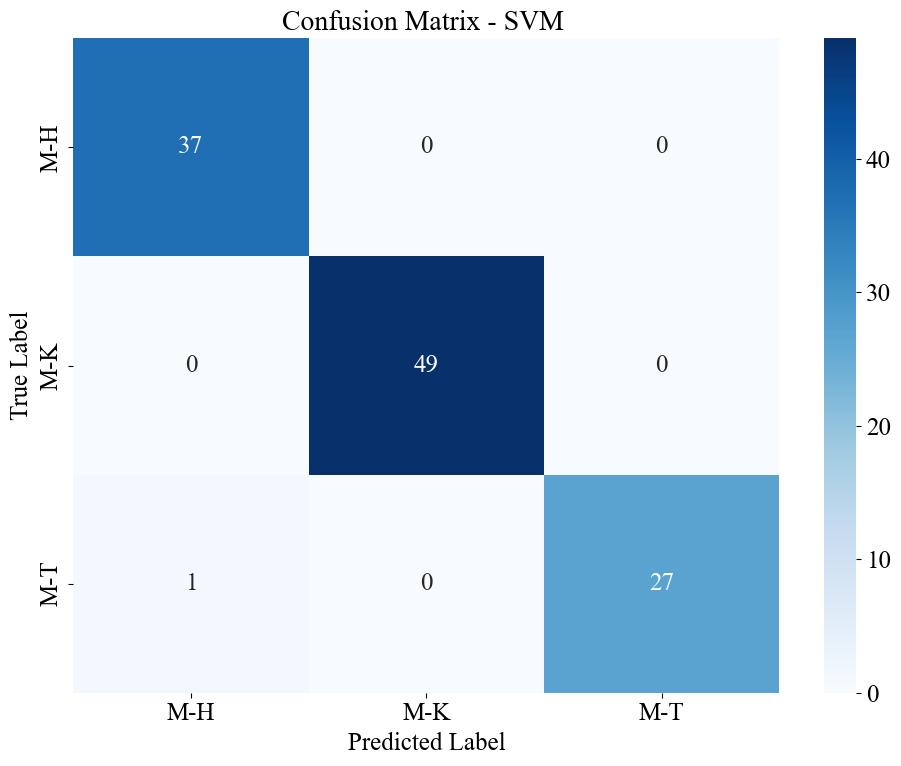


Classification Report (Test Data):
              precision    recall  f1-score     support
M-H            0.973684  1.000000  0.986667   37.000000
M-K            1.000000  1.000000  1.000000   49.000000
M-T            1.000000  0.964286  0.981818   28.000000
accuracy       0.991228  0.991228  0.991228    0.991228
macro avg      0.991228  0.988095  0.989495  114.000000
weighted avg   0.991459  0.991228  0.991207  114.000000

Classification Report (Train Data):
              precision    recall  f1-score     support
M-H            0.913043  0.965517  0.938547   87.000000
M-K            0.991228  1.000000  0.995595  113.000000
M-T            0.966102  0.876923  0.919355   65.000000
accuracy       0.958491  0.958491  0.958491    0.958491
macro avg      0.956791  0.947480  0.951166  265.000000
weighted avg   0.959397  0.958491  0.958166  265.000000

Honey Analysis Workflow Completed.
Results saved in: /content/drive/MyDrive/Kuliah/TA/ML/OT/Lebah_honey_analysis_results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import time
import requests
import os
import joblib
from datetime import datetime
import random

nama = 'Lebah_'
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

class HoneyAnalysis:
    def __init__(self, data_path=None, from_api=True, api_url="https://madu.software/get_sensor_data/"):
        self.data_path = data_path
        self.from_api = from_api
        self.api_url = api_url
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.class_names = None
        self.label_encoder = None
        self.scaler = None
        self.cv = 5

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        self.results_dir = f"/content/drive/MyDrive/Kuliah/TA/ML/OT/{nama}honey_analysis_results"
        os.makedirs(self.results_dir, exist_ok=True)

        self.ann_best_params = None
        self.rf_best_params = None
        self.svm_best_params = None

        self._load_data()

    def _load_data(self):
        if self.from_api:
            print("Fetching data from API...")
            response = requests.get(self.api_url)
            if response.status_code == 200:
                self.data = pd.DataFrame(response.json())
                print("Data fetched successfully!")
            else:
                print(f"Error fetching data. Status code: {response.status_code}")
                return
        else:
            print(f"Loading data from {self.data_path}...")
            if self.data_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.data_path)
            elif self.data_path.endswith('.json'):
                self.data = pd.read_json(self.data_path)
            else:
                print("Unsupported file format. Please use .xlsx or .json")
                return
            print("Data loaded successfully!")

        honey_types = [
            'Madu Kelenceng_itama_4mL', 'Madu Kelenceng_mauni_4mL',
            'Madu Ternak_kopi_4mL', 'Madu Ternak_Sonokeling_4mL', 'Madu Ternak_Kelengkeng_4mL',
            'Madu Hutan_Bangka_4mL', 'Madu Hutan_Sumbawa_4mL', 'Madu Hutan_Jambi_4mL', 'Madu Hutan_Riau_4mL'
        ]
        self.data = self.data[self.data['name'].isin(honey_types)]
        print(f"Data filtered to {len(self.data)} samples.")

    def preprocess_data(self, test_size=0.2, random_state=RANDOM_SEED, apply_pca=False, n_components=10):
        print("Preprocessing data...")
        self.feature_names = [col for col in self.data.columns if col.startswith(('uv_', 'vis_', 'nir_'))]
        X = self.data[self.feature_names]
        y = self.data['kode']
        y = y.str.replace('mauni', 'Mauni').str.replace('itama', 'Itama').str.replace('kopi', 'Kopi').str.replace('_', ' ').str.replace('4mL', '').str.strip()
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.class_names = self.label_encoder.classes_
        print(f"Classes: {self.class_names}")

        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X)

        X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
        )

        if apply_pca:
            print(f"Applying PCA with {n_components} components...")
            pca = PCA(n_components=n_components, random_state=random_state)
            X_train_scaled = pca.fit_transform(X_train_scaled)
            X_test_scaled = pca.transform(X_test_scaled)
            explained_variance = np.sum(pca.explained_variance_ratio_)
            print(f"PCA explained variance: {explained_variance:.4f}")
            self.feature_names = [f"PC{i+1}" for i in range(n_components)]

        self.X_train = X_train_scaled
        self.X_test = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        self.X = np.vstack((X_train_scaled, X_test_scaled))
        self.y = np.concatenate((y_train, y_test))

        print(f"Data preprocessed. Training set: {self.X_train.shape}, Test set: {self.X_test.shape}")
        print("\nClass distribution:")
        for idx, class_name in enumerate(self.class_names):
            train_count = np.sum(y_train == idx)
            test_count = np.sum(y_test == idx)
            print(f"  {class_name}: {train_count} (train), {test_count} (test)")

        pd.DataFrame({
            'Class': self.class_names,
            'Train Count': [np.sum(y_train == i) for i in range(len(self.class_names))],
            'Test Count': [np.sum(y_test == i) for i in range(len(self.class_names))],
            'Total Count': [np.sum(y_encoded == i) for i in range(len(self.class_names))]
        }).to_csv(os.path.join(self.results_dir, f'{nama}data_summary.csv'), index=False)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def search_hyperparameters(self, model_type='ANN', cv=5, n_jobs=-1):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print(f"Searching hyperparameters for {model_type}...")

        if model_type == 'ANN':
            param_grid = {
                "hidden_layer_sizes": [
                    (58,), (116,), (58,10), (116,10),
                    (58,58), (116,58), (58,58,58), (116,116,116)
                ],
                "solver": ['lbfgs', 'sgd'],
                "activation": ['identity', 'tanh', 'relu'],
                "alpha": [0.0001, 0.001, 0.01],
            }
            model = MLPClassifier(
                learning_rate_init=0.01,
                batch_size=32,
                max_iter=200,
                random_state=RANDOM_SEED,
                early_stopping=True,
                n_iter_no_change=10
            )
        elif model_type == 'RF':
            param_grid = {
                "n_estimators": [100, 200, 300, 400, 500],
                "max_depth": [None, 10, 20, 30],
            }
            model = RandomForestClassifier(
                max_features='sqrt',
                min_samples_split=2,
                min_samples_leaf=1,
                bootstrap=True,
                random_state=RANDOM_SEED,
                n_jobs=n_jobs
            )
        elif model_type == 'SVM':
            param_grid = {
                "kernel": ["linear", "rbf", "poly"],
                "C": [0.1, 1, 10, 100, 1000],
                "gamma": [1, 0.1, 0.01, 0.001]
            }
            model = SVC(probability=True, random_state=RANDOM_SEED)
        else:
            raise ValueError("model_type must be one of 'ANN', 'RF', 'SVM'.")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='accuracy',
            n_jobs=n_jobs,
            cv=cv,
            verbose=2
        )
        grid_search.fit(self.X_train, self.y_train)
        print(f"Best parameters for {model_type}: {grid_search.best_params_}")
        print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

        results_df = pd.DataFrame(grid_search.cv_results_)
        results_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_type}_grid_search_results.csv'), index=False)

        if model_type == 'ANN':
            self.ann_best_params = grid_search.best_params_
        elif model_type == 'RF':
            self.rf_best_params = grid_search.best_params_
        elif model_type == 'SVM':
            self.svm_best_params = grid_search.best_params_

        return grid_search.best_params_

    def train_ann(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training ANN model (scikit-learn MLPClassifier)...")
        start_time = time.time()
        params = self.ann_best_params if self.ann_best_params else {
            "hidden_layer_sizes": (116, 116, 116),
            "activation": "tanh",
            "solver": "adam",
            "alpha": 0.0001
        }
        ann_model = MLPClassifier(
            hidden_layer_sizes=params.get("hidden_layer_sizes", (116, 116, 116)),
            activation=params.get("activation", 'tanh'),
            solver=params.get("solver", 'adam'),
            alpha=params.get("alpha", 0.0001),
            learning_rate_init=0.01,
            batch_size=32,
            max_iter=200,
            random_state=RANDOM_SEED,
            early_stopping=True,
            n_iter_no_change=10,
            verbose=True
        )
        ann_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"ANN model trained in {training_time:.2f} seconds")
        joblib.dump(ann_model, os.path.join(self.results_dir, f'{nama}ann_model.pkl'))
        return ann_model

    def train_random_forest(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training Random Forest model...")
        start_time = time.time()
        params = self.rf_best_params if self.rf_best_params else {
            "n_estimators": 300,
            "max_depth": None
        }
        rf_model = RandomForestClassifier(
            n_estimators=params.get("n_estimators", 300),
            max_features='sqrt',
            max_depth=params.get("max_depth", None),
            min_samples_split=2,
            min_samples_leaf=1,
            bootstrap=True,
            random_state=RANDOM_SEED,
            n_jobs=-1
        )
        rf_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"Random Forest model trained in {training_time:.2f} seconds")
        joblib.dump(rf_model, os.path.join(self.results_dir, f'{nama}random_forest_model.pkl'))
        return rf_model

    def train_svm(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training SVM model...")
        start_time = time.time()
        params = self.svm_best_params if self.svm_best_params else {
            "kernel": "rbf",
            "C": 1000,
            "gamma": 0.0001
        }
        svm_model = SVC(
            kernel=params.get("kernel", "rbf"),
            C=params.get("C", 1000),
            gamma=params.get("gamma", 0.0001),
            probability=True,
            random_state=RANDOM_SEED
        )
        svm_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"SVM model trained in {training_time:.2f} seconds")
        joblib.dump(svm_model, os.path.join(self.results_dir, f'{nama}svm_model.pkl'))
        return svm_model

    def cross_validate_model(self, model, model_name, n_folds=5):
        print(f"\nCross-validating {model_name}...")
        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)
        scores = cross_validate(
            model, self.X, self.y,
            cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
        )
        print(f"{model_name} CV Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
        print(f"{model_name} CV F1 Score: {scores['test_f1_weighted'].mean():.4f} ± {scores['test_f1_weighted'].std():.4f}")

        cv_results = pd.DataFrame({
            'fold': np.arange(1, n_folds+1),
            'accuracy': scores['test_accuracy'],
            'precision': scores['test_precision_weighted'],
            'recall': scores['test_recall_weighted'],
            'f1': scores['test_f1_weighted'],
        })
        cv_results.to_csv(os.path.join(self.results_dir, f"{nama}{model_name.lower()}_cv_folds.csv"), index=False)
        # Return mean and std for summary
        return {
            'model': model_name,
            'accuracy_mean': scores['test_accuracy'].mean(),
            'accuracy_std': scores['test_accuracy'].std(),
            'precision_mean': scores['test_precision_weighted'].mean(),
            'precision_std': scores['test_precision_weighted'].std(),
            'recall_mean': scores['test_recall_weighted'].mean(),
            'recall_std': scores['test_recall_weighted'].std(),
            'f1_mean': scores['test_f1_weighted'].mean(),
            'f1_std': scores['test_f1_weighted'].std()
        }

    def evaluate_model(self, model, model_name):
        print(f"\nEvaluating {model_name} model...")
        y_pred_test = model.predict(self.X_test)
        y_pred_train = model.predict(self.X_train)

        train_accuracy = accuracy_score(self.y_train, y_pred_train)
        train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
        train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
        train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')

        test_accuracy = accuracy_score(self.y_test, y_pred_test)
        test_precision = precision_score(self.y_test, y_pred_test, average='weighted')
        test_recall = recall_score(self.y_test, y_pred_test, average='weighted')
        test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

        print("\nModel Performance Comparison:")
        print(f"{'Metric':<10} {'Training':<10} {'Testing':<10}")
        print("-" * 30)
        print(f"{'Accuracy':<10} {train_accuracy:.4f}     {test_accuracy:.4f}")
        print(f"{'Precision':<10} {train_precision:.4f}     {test_precision:.4f}")
        print(f"{'Recall':<10} {train_recall:.4f}     {test_recall:.4f}")
        print(f"{'F1 Score':<10} {train_f1:.4f}     {test_f1:.4f}")

        cm = confusion_matrix(self.y_test, y_pred_test)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=self.class_names,
                 yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name} ')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_confusion_matrix.png'))
        plt.show()

        test_report = classification_report(self.y_test, y_pred_test, target_names=self.class_names, output_dict=True)
        test_report_df = pd.DataFrame(test_report).transpose()
        print("\nClassification Report (Test Data):")
        print(test_report_df)
        test_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_classification_report.csv'))

        train_report = classification_report(self.y_train, y_pred_train, target_names=self.class_names, output_dict=True)
        train_report_df = pd.DataFrame(train_report).transpose()
        print("\nClassification Report (Train Data):")
        print(train_report_df)
        train_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_train_classification_report.csv'))

        metrics_dict = {
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1
        }

        metrics_df = pd.DataFrame([metrics_dict])
        metrics_file = os.path.join(self.results_dir, f'{nama}model_metrics.csv')

        if os.path.exists(metrics_file):
            existing_metrics = pd.read_csv(metrics_file)
            updated_metrics = pd.concat([existing_metrics, metrics_df], ignore_index=True)
            updated_metrics.to_csv(metrics_file, index=False)
        else:
            metrics_df.to_csv(metrics_file, index=False)

        return metrics_dict

if __name__ == '__main__':
    USE_API = True
    LOCAL_DATA_PATH = 'data/sensor_data.xlsx'
    APPLY_PCA = False
    PCA_COMPONENTS = 10
    TEST_SPLIT_SIZE = 0.3

    print("Starting Honey Analysis Workflow...")
    analyzer = HoneyAnalysis(data_path=LOCAL_DATA_PATH, from_api=USE_API)
    analyzer.preprocess_data(test_size=TEST_SPLIT_SIZE, random_state=RANDOM_SEED,
                             apply_pca=APPLY_PCA, n_components=PCA_COMPONENTS)

    # --- Hyperparameter Search First ---
    print("\n--- Hyperparameter Search: ANN ---")
    analyzer.search_hyperparameters('ANN', cv=5)
    print("\n--- Hyperparameter Search: RF ---")
    analyzer.search_hyperparameters('RF', cv=5)
    print("\n--- Hyperparameter Search: SVM ---")
    analyzer.search_hyperparameters('SVM', cv=5)

    # --- Model Training with Best Hyperparameters ---
    print("\n--- Training Models with Best Hyperparameters ---")
    ann_model = analyzer.train_ann()
    rf_model = analyzer.train_random_forest()
    svm_model = analyzer.train_svm()

    models_dict = {}
    if ann_model:
        models_dict['ANN'] = ann_model
    if rf_model:
        models_dict['RF'] = rf_model
    if svm_model:
        models_dict['SVM'] = svm_model

    # --- Cross Validation Setiap Model, Simpan Rata-Rata ke Satu File ---
    cv_summary = []
    if models_dict:
        print("\n--- Cross Validation Setiap Model ---")
        for model_name, model_instance in models_dict.items():
            cv_result = analyzer.cross_validate_model(model_instance, model_name, n_folds=5)
            cv_summary.append(cv_result)

        # Simpan summary rata-rata ke satu file
        cv_summary_df = pd.DataFrame(cv_summary)
        cv_summary_file = os.path.join(analyzer.results_dir, f"{nama}cv_summary.csv")
        cv_summary_df.to_csv(cv_summary_file, index=False)

        print("\n=== CV Summary ===")
        print(cv_summary_df)

        # Tentukan model terbaik berdasarkan rata-rata f1 tertinggi
        best_model_idx = cv_summary_df['f1_mean'].idxmax()
        best_model_name = cv_summary_df.iloc[best_model_idx]['model']
        best_model_f1 = cv_summary_df.iloc[best_model_idx]['f1_mean']
        print(f"\nModel terbaik berdasarkan rata-rata F1: {best_model_name} (F1 = {best_model_f1:.4f})")

        # --- Evaluasi ---
        print("\n--- Evaluating Models ---")
        for model_name, model_instance in models_dict.items():
            analyzer.evaluate_model(model_instance, model_name)
    else:
        print("\nNo models were trained successfully. Skipping evaluation.")

    print("\nHoney Analysis Workflow Completed.")
    if hasattr(analyzer, 'results_dir') and analyzer.results_dir:
         print(f"Results saved in: {os.path.abspath(analyzer.results_dir)}")

# Madu

Starting Honey Analysis Workflow...
Fetching data from API...
Data fetched successfully!
Data filtered to 379 samples.
Preprocessing data...
Classes: ['Madu Hutan Bangka' 'Madu Hutan Jambi' 'Madu Hutan Riau'
 'Madu Hutan Sumbawa' 'Madu Kelenceng Itama' 'Madu Kelenceng Mauni'
 'Madu Ternak Kelengkeng' 'Madu Ternak Kopi' 'Madu Ternak Sonokeling']
Data preprocessed. Training set: (265, 18), Test set: (114, 18)

Class distribution:
  Madu Hutan Bangka: 22 (train), 9 (test)
  Madu Hutan Jambi: 22 (train), 9 (test)
  Madu Hutan Riau: 22 (train), 9 (test)
  Madu Hutan Sumbawa: 22 (train), 9 (test)
  Madu Kelenceng Itama: 56 (train), 25 (test)
  Madu Kelenceng Mauni: 56 (train), 25 (test)
  Madu Ternak Kelengkeng: 22 (train), 9 (test)
  Madu Ternak Kopi: 22 (train), 9 (test)
  Madu Ternak Sonokeling: 21 (train), 10 (test)

--- Hyperparameter Search: ANN ---
Searching hyperparameters for ANN...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for ANN: {'activation'

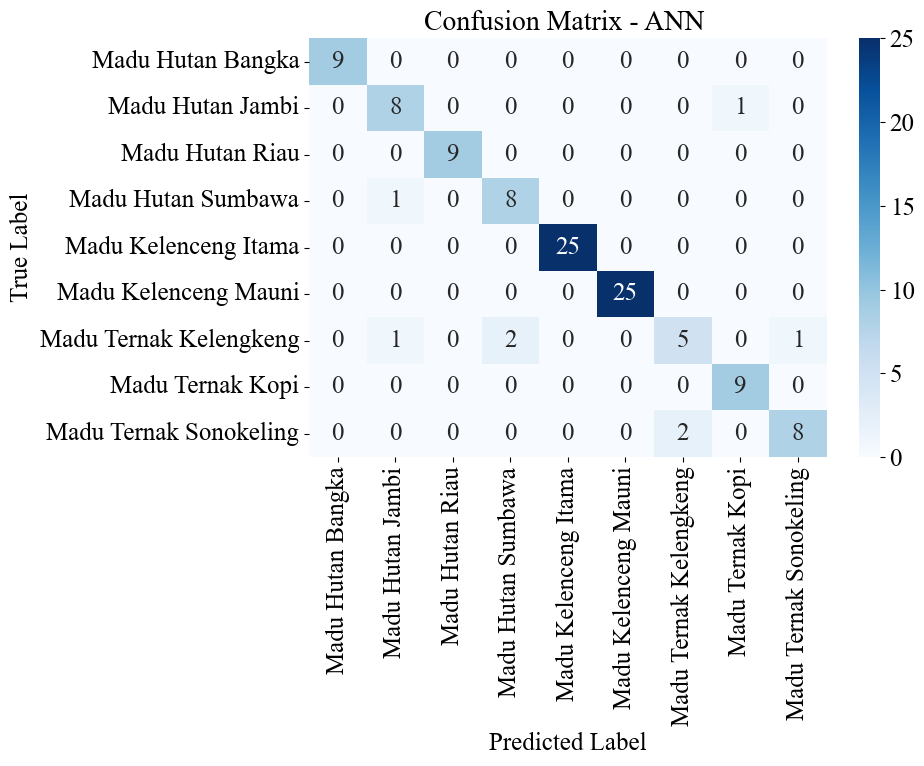


Classification Report (Test Data):
                        precision    recall  f1-score     support
Madu Hutan Bangka        1.000000  1.000000  1.000000    9.000000
Madu Hutan Jambi         0.800000  0.888889  0.842105    9.000000
Madu Hutan Riau          1.000000  1.000000  1.000000    9.000000
Madu Hutan Sumbawa       0.800000  0.888889  0.842105    9.000000
Madu Kelenceng Itama     1.000000  1.000000  1.000000   25.000000
Madu Kelenceng Mauni     1.000000  1.000000  1.000000   25.000000
Madu Ternak Kelengkeng   0.714286  0.555556  0.625000    9.000000
Madu Ternak Kopi         0.900000  1.000000  0.947368    9.000000
Madu Ternak Sonokeling   0.888889  0.800000  0.842105   10.000000
accuracy                 0.929825  0.929825  0.929825    0.929825
macro avg                0.900353  0.903704  0.899854  114.000000
weighted avg             0.928223  0.929825  0.927458  114.000000

Classification Report (Train Data):
                        precision  recall  f1-score  support
Madu Hut

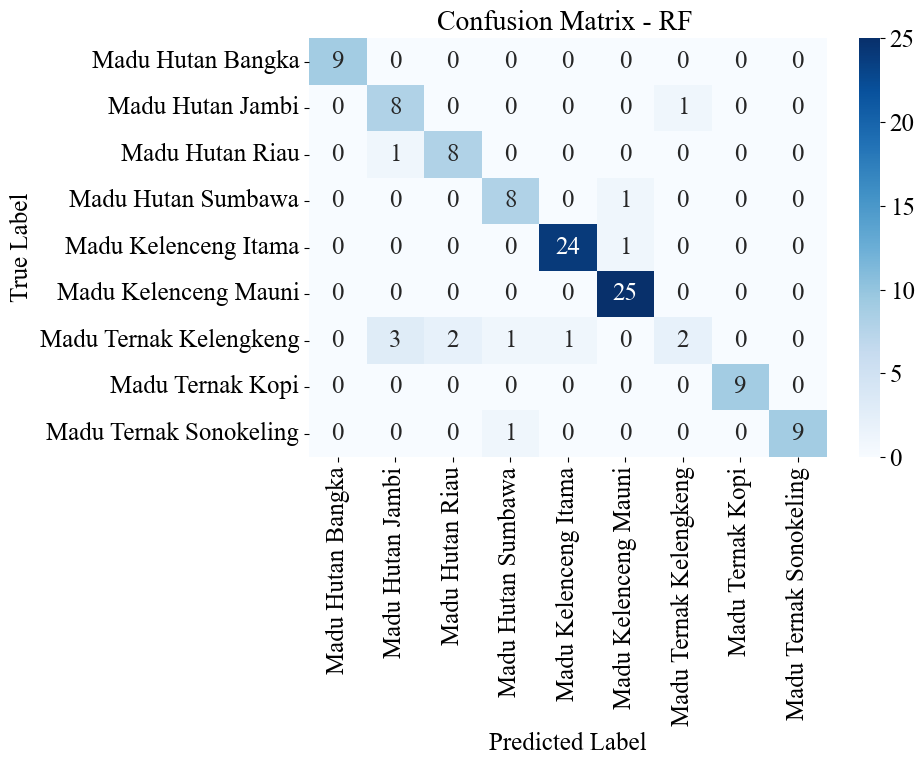


Classification Report (Test Data):
                        precision    recall  f1-score     support
Madu Hutan Bangka        1.000000  1.000000  1.000000    9.000000
Madu Hutan Jambi         0.666667  0.888889  0.761905    9.000000
Madu Hutan Riau          0.800000  0.888889  0.842105    9.000000
Madu Hutan Sumbawa       0.800000  0.888889  0.842105    9.000000
Madu Kelenceng Itama     0.960000  0.960000  0.960000   25.000000
Madu Kelenceng Mauni     0.925926  1.000000  0.961538   25.000000
Madu Ternak Kelengkeng   0.666667  0.222222  0.333333    9.000000
Madu Ternak Kopi         1.000000  1.000000  1.000000    9.000000
Madu Ternak Sonokeling   1.000000  0.900000  0.947368   10.000000
accuracy                 0.894737  0.894737  0.894737    0.894737
macro avg                0.868807  0.860988  0.849817  114.000000
weighted avg             0.890773  0.894737  0.881817  114.000000

Classification Report (Train Data):
                        precision  recall  f1-score  support
Madu Hut

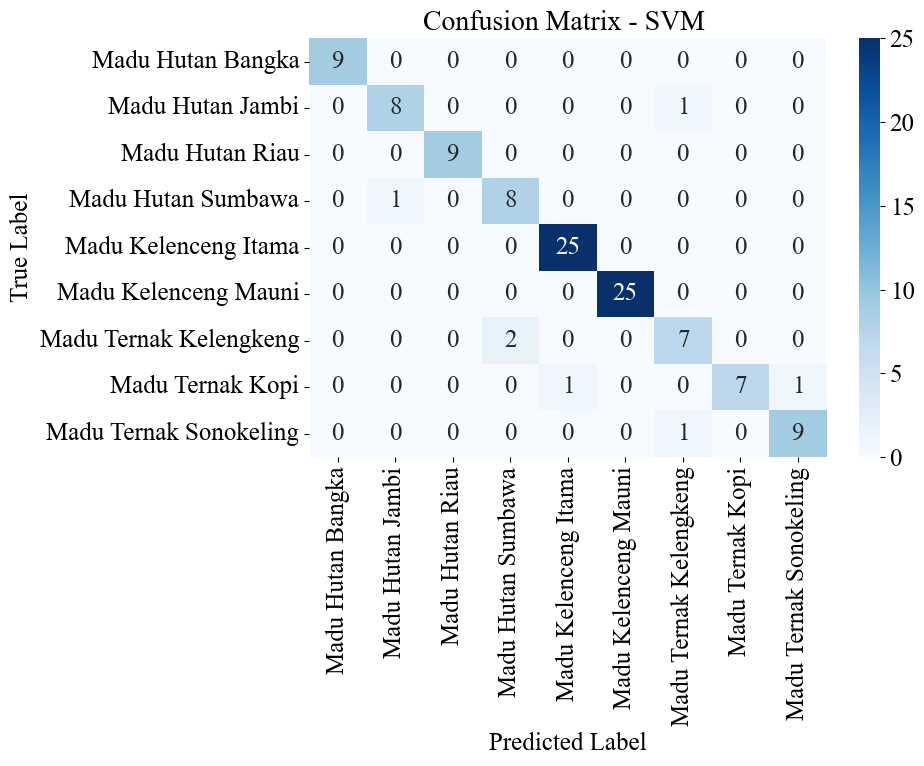


Classification Report (Test Data):
                        precision    recall  f1-score     support
Madu Hutan Bangka        1.000000  1.000000  1.000000    9.000000
Madu Hutan Jambi         0.888889  0.888889  0.888889    9.000000
Madu Hutan Riau          1.000000  1.000000  1.000000    9.000000
Madu Hutan Sumbawa       0.800000  0.888889  0.842105    9.000000
Madu Kelenceng Itama     0.961538  1.000000  0.980392   25.000000
Madu Kelenceng Mauni     1.000000  1.000000  1.000000   25.000000
Madu Ternak Kelengkeng   0.777778  0.777778  0.777778    9.000000
Madu Ternak Kopi         1.000000  0.777778  0.875000    9.000000
Madu Ternak Sonokeling   0.900000  0.900000  0.900000   10.000000
accuracy                 0.938596  0.938596  0.938596    0.938596
macro avg                0.925356  0.914815  0.918240  114.000000
weighted avg             0.940688  0.938596  0.938279  114.000000

Classification Report (Train Data):
                        precision    recall  f1-score     support
Mad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import time
import requests
import os
import joblib
from datetime import datetime
import random

nama = 'Madu_'
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

class HoneyAnalysis:
    def __init__(self, data_path=None, from_api=True, api_url="https://madu.software/get_sensor_data/"):
        self.data_path = data_path
        self.from_api = from_api
        self.api_url = api_url
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.class_names = None
        self.label_encoder = None
        self.scaler = None
        self.cv = 5

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        self.results_dir = f"/content/drive/MyDrive/Kuliah/TA/ML/OT/{nama}honey_analysis_results"
        os.makedirs(self.results_dir, exist_ok=True)

        self.ann_best_params = None
        self.rf_best_params = None
        self.svm_best_params = None

        self._load_data()

    def _load_data(self):
        if self.from_api:
            print("Fetching data from API...")
            response = requests.get(self.api_url)
            if response.status_code == 200:
                self.data = pd.DataFrame(response.json())
                print("Data fetched successfully!")
            else:
                print(f"Error fetching data. Status code: {response.status_code}")
                return
        else:
            print(f"Loading data from {self.data_path}...")
            if self.data_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.data_path)
            elif self.data_path.endswith('.json'):
                self.data = pd.read_json(self.data_path)
            else:
                print("Unsupported file format. Please use .xlsx or .json")
                return
            print("Data loaded successfully!")

        honey_types = [
            'Madu Kelenceng_itama_4mL', 'Madu Kelenceng_mauni_4mL',
            'Madu Ternak_kopi_4mL', 'Madu Ternak_Sonokeling_4mL', 'Madu Ternak_Kelengkeng_4mL',
            'Madu Hutan_Bangka_4mL', 'Madu Hutan_Sumbawa_4mL', 'Madu Hutan_Jambi_4mL', 'Madu Hutan_Riau_4mL'
        ]
        self.data = self.data[self.data['name'].isin(honey_types)]
        print(f"Data filtered to {len(self.data)} samples.")

    def preprocess_data(self, test_size=0.2, random_state=RANDOM_SEED, apply_pca=False, n_components=10):
        print("Preprocessing data...")
        self.feature_names = [col for col in self.data.columns if col.startswith(('uv_', 'vis_', 'nir_'))]
        X = self.data[self.feature_names]
        y = self.data['name']
        y = y.str.replace('mauni', 'Mauni').str.replace('itama', 'Itama').str.replace('kopi', 'Kopi').str.replace('_', ' ').str.replace('4mL', '').str.strip()
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.class_names = self.label_encoder.classes_
        print(f"Classes: {self.class_names}")

        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X)

        X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
        )

        if apply_pca:
            print(f"Applying PCA with {n_components} components...")
            pca = PCA(n_components=n_components, random_state=random_state)
            X_train_scaled = pca.fit_transform(X_train_scaled)
            X_test_scaled = pca.transform(X_test_scaled)
            explained_variance = np.sum(pca.explained_variance_ratio_)
            print(f"PCA explained variance: {explained_variance:.4f}")
            self.feature_names = [f"PC{i+1}" for i in range(n_components)]

        self.X_train = X_train_scaled
        self.X_test = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        self.X = np.vstack((X_train_scaled, X_test_scaled))
        self.y = np.concatenate((y_train, y_test))

        print(f"Data preprocessed. Training set: {self.X_train.shape}, Test set: {self.X_test.shape}")
        print("\nClass distribution:")
        for idx, class_name in enumerate(self.class_names):
            train_count = np.sum(y_train == idx)
            test_count = np.sum(y_test == idx)
            print(f"  {class_name}: {train_count} (train), {test_count} (test)")

        pd.DataFrame({
            'Class': self.class_names,
            'Train Count': [np.sum(y_train == i) for i in range(len(self.class_names))],
            'Test Count': [np.sum(y_test == i) for i in range(len(self.class_names))],
            'Total Count': [np.sum(y_encoded == i) for i in range(len(self.class_names))]
        }).to_csv(os.path.join(self.results_dir, f'{nama}data_summary.csv'), index=False)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def search_hyperparameters(self, model_type='ANN', cv=5, n_jobs=-1):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print(f"Searching hyperparameters for {model_type}...")

        if model_type == 'ANN':
            param_grid = {
                "hidden_layer_sizes": [
                    (58,), (116,), (58,10), (116,10),
                    (58,58), (116,58), (58,58,58), (116,116,116)
                ],
                "solver": ['lbfgs', 'sgd'],
                "activation": ['identity', 'tanh', 'relu'],
                "alpha": [0.0001, 0.001, 0.01],
            }
            model = MLPClassifier(
                learning_rate_init=0.01,
                batch_size=32,
                max_iter=200,
                random_state=RANDOM_SEED,
                early_stopping=True,
                n_iter_no_change=10
            )
        elif model_type == 'RF':
            param_grid = {
                "n_estimators": [100, 200, 300, 400, 500],
                "max_depth": [None, 10, 20, 30],
            }
            model = RandomForestClassifier(
                max_features='sqrt',
                min_samples_split=2,
                min_samples_leaf=1,
                bootstrap=True,
                random_state=RANDOM_SEED,
                n_jobs=n_jobs
            )
        elif model_type == 'SVM':
            param_grid = {
                "kernel": ["linear", "rbf", "poly"],
                "C": [0.1, 1, 10, 100, 1000],
                "gamma": [1, 0.1, 0.01, 0.001]
            }
            model = SVC(probability=True, random_state=RANDOM_SEED)
        else:
            raise ValueError("model_type must be one of 'ANN', 'RF', 'SVM'.")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='accuracy',
            n_jobs=n_jobs,
            cv=cv,
            verbose=2
        )
        grid_search.fit(self.X_train, self.y_train)
        print(f"Best parameters for {model_type}: {grid_search.best_params_}")
        print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

        results_df = pd.DataFrame(grid_search.cv_results_)
        results_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_type}_grid_search_results.csv'), index=False)

        if model_type == 'ANN':
            self.ann_best_params = grid_search.best_params_
        elif model_type == 'RF':
            self.rf_best_params = grid_search.best_params_
        elif model_type == 'SVM':
            self.svm_best_params = grid_search.best_params_

        return grid_search.best_params_

    def train_ann(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training ANN model (scikit-learn MLPClassifier)...")
        start_time = time.time()
        params = self.ann_best_params if self.ann_best_params else {
            "hidden_layer_sizes": (116, 116, 116),
            "activation": "tanh",
            "solver": "adam",
            "alpha": 0.0001
        }
        ann_model = MLPClassifier(
            hidden_layer_sizes=params.get("hidden_layer_sizes", (116, 116, 116)),
            activation=params.get("activation", 'tanh'),
            solver=params.get("solver", 'adam'),
            alpha=params.get("alpha", 0.0001),
            learning_rate_init=0.01,
            batch_size=32,
            max_iter=200,
            random_state=RANDOM_SEED,
            early_stopping=True,
            n_iter_no_change=10,
            verbose=True
        )
        ann_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"ANN model trained in {training_time:.2f} seconds")
        joblib.dump(ann_model, os.path.join(self.results_dir, f'{nama}ann_model.pkl'))
        return ann_model

    def train_random_forest(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training Random Forest model...")
        start_time = time.time()
        params = self.rf_best_params if self.rf_best_params else {
            "n_estimators": 300,
            "max_depth": None
        }
        rf_model = RandomForestClassifier(
            n_estimators=params.get("n_estimators", 300),
            max_features='sqrt',
            max_depth=params.get("max_depth", None),
            min_samples_split=2,
            min_samples_leaf=1,
            bootstrap=True,
            random_state=RANDOM_SEED,
            n_jobs=-1
        )
        rf_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"Random Forest model trained in {training_time:.2f} seconds")
        joblib.dump(rf_model, os.path.join(self.results_dir, f'{nama}random_forest_model.pkl'))
        return rf_model

    def train_svm(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training SVM model...")
        start_time = time.time()
        params = self.svm_best_params if self.svm_best_params else {
            "kernel": "rbf",
            "C": 1000,
            "gamma": 0.0001
        }
        svm_model = SVC(
            kernel=params.get("kernel", "rbf"),
            C=params.get("C", 1000),
            gamma=params.get("gamma", 0.0001),
            probability=True,
            random_state=RANDOM_SEED
        )
        svm_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"SVM model trained in {training_time:.2f} seconds")
        joblib.dump(svm_model, os.path.join(self.results_dir, f'{nama}svm_model.pkl'))
        return svm_model

    def cross_validate_model(self, model, model_name, n_folds=5):
        print(f"\nCross-validating {model_name}...")
        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)
        scores = cross_validate(
            model, self.X, self.y,
            cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
        )
        print(f"{model_name} CV Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
        print(f"{model_name} CV F1 Score: {scores['test_f1_weighted'].mean():.4f} ± {scores['test_f1_weighted'].std():.4f}")

        cv_results = pd.DataFrame({
            'fold': np.arange(1, n_folds+1),
            'accuracy': scores['test_accuracy'],
            'precision': scores['test_precision_weighted'],
            'recall': scores['test_recall_weighted'],
            'f1': scores['test_f1_weighted'],
        })
        cv_results.to_csv(os.path.join(self.results_dir, f"{nama}{model_name.lower()}_cv_folds.csv"), index=False)
        # Return mean and std for summary
        return {
            'model': model_name,
            'accuracy_mean': scores['test_accuracy'].mean(),
            'accuracy_std': scores['test_accuracy'].std(),
            'precision_mean': scores['test_precision_weighted'].mean(),
            'precision_std': scores['test_precision_weighted'].std(),
            'recall_mean': scores['test_recall_weighted'].mean(),
            'recall_std': scores['test_recall_weighted'].std(),
            'f1_mean': scores['test_f1_weighted'].mean(),
            'f1_std': scores['test_f1_weighted'].std()
        }

    def evaluate_model(self, model, model_name):
        print(f"\nEvaluating {model_name} model...")
        y_pred_test = model.predict(self.X_test)
        y_pred_train = model.predict(self.X_train)

        train_accuracy = accuracy_score(self.y_train, y_pred_train)
        train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
        train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
        train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')

        test_accuracy = accuracy_score(self.y_test, y_pred_test)
        test_precision = precision_score(self.y_test, y_pred_test, average='weighted')
        test_recall = recall_score(self.y_test, y_pred_test, average='weighted')
        test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

        print("\nModel Performance Comparison:")
        print(f"{'Metric':<10} {'Training':<10} {'Testing':<10}")
        print("-" * 30)
        print(f"{'Accuracy':<10} {train_accuracy:.4f}     {test_accuracy:.4f}")
        print(f"{'Precision':<10} {train_precision:.4f}     {test_precision:.4f}")
        print(f"{'Recall':<10} {train_recall:.4f}     {test_recall:.4f}")
        print(f"{'F1 Score':<10} {train_f1:.4f}     {test_f1:.4f}")

        cm = confusion_matrix(self.y_test, y_pred_test)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=self.class_names,
                 yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name} ')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_confusion_matrix.png'))
        plt.show()

        test_report = classification_report(self.y_test, y_pred_test, target_names=self.class_names, output_dict=True)
        test_report_df = pd.DataFrame(test_report).transpose()
        print("\nClassification Report (Test Data):")
        print(test_report_df)
        test_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_classification_report.csv'))

        train_report = classification_report(self.y_train, y_pred_train, target_names=self.class_names, output_dict=True)
        train_report_df = pd.DataFrame(train_report).transpose()
        print("\nClassification Report (Train Data):")
        print(train_report_df)
        train_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_train_classification_report.csv'))

        metrics_dict = {
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1
        }

        metrics_df = pd.DataFrame([metrics_dict])
        metrics_file = os.path.join(self.results_dir, f'{nama}model_metrics.csv')

        if os.path.exists(metrics_file):
            existing_metrics = pd.read_csv(metrics_file)
            updated_metrics = pd.concat([existing_metrics, metrics_df], ignore_index=True)
            updated_metrics.to_csv(metrics_file, index=False)
        else:
            metrics_df.to_csv(metrics_file, index=False)

        return metrics_dict

if __name__ == '__main__':
    USE_API = True
    LOCAL_DATA_PATH = 'data/sensor_data.xlsx'
    APPLY_PCA = False
    PCA_COMPONENTS = 10
    TEST_SPLIT_SIZE = 0.3

    print("Starting Honey Analysis Workflow...")
    analyzer = HoneyAnalysis(data_path=LOCAL_DATA_PATH, from_api=USE_API)
    analyzer.preprocess_data(test_size=TEST_SPLIT_SIZE, random_state=RANDOM_SEED,
                             apply_pca=APPLY_PCA, n_components=PCA_COMPONENTS)

    # --- Hyperparameter Search First ---
    print("\n--- Hyperparameter Search: ANN ---")
    analyzer.search_hyperparameters('ANN', cv=5)
    print("\n--- Hyperparameter Search: RF ---")
    analyzer.search_hyperparameters('RF', cv=5)
    print("\n--- Hyperparameter Search: SVM ---")
    analyzer.search_hyperparameters('SVM', cv=5)

    # --- Model Training with Best Hyperparameters ---
    print("\n--- Training Models with Best Hyperparameters ---")
    ann_model = analyzer.train_ann()
    rf_model = analyzer.train_random_forest()
    svm_model = analyzer.train_svm()

    models_dict = {}
    if ann_model:
        models_dict['ANN'] = ann_model
    if rf_model:
        models_dict['RF'] = rf_model
    if svm_model:
        models_dict['SVM'] = svm_model

    # --- Cross Validation Setiap Model, Simpan Rata-Rata ke Satu File ---
    cv_summary = []
    if models_dict:
        print("\n--- Cross Validation Setiap Model ---")
        for model_name, model_instance in models_dict.items():
            cv_result = analyzer.cross_validate_model(model_instance, model_name, n_folds=5)
            cv_summary.append(cv_result)

        # Simpan summary rata-rata ke satu file
        cv_summary_df = pd.DataFrame(cv_summary)
        cv_summary_file = os.path.join(analyzer.results_dir, f"{nama}cv_summary.csv")
        cv_summary_df.to_csv(cv_summary_file, index=False)

        print("\n=== CV Summary ===")
        print(cv_summary_df)

        # Tentukan model terbaik berdasarkan rata-rata f1 tertinggi
        best_model_idx = cv_summary_df['f1_mean'].idxmax()
        best_model_name = cv_summary_df.iloc[best_model_idx]['model']
        best_model_f1 = cv_summary_df.iloc[best_model_idx]['f1_mean']
        print(f"\nModel terbaik berdasarkan rata-rata F1: {best_model_name} (F1 = {best_model_f1:.4f})")

        # --- Evaluasi ---
        print("\n--- Evaluating Models ---")
        for model_name, model_instance in models_dict.items():
            analyzer.evaluate_model(model_instance, model_name)
    else:
        print("\nNo models were trained successfully. Skipping evaluation.")

    print("\nHoney Analysis Workflow Completed.")
    if hasattr(analyzer, 'results_dir') and analyzer.results_dir:
         print(f"Results saved in: {os.path.abspath(analyzer.results_dir)}")

# Hutan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import time
import requests
import os
import joblib
from datetime import datetime
import random

nama = 'Hutan_'
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

class HoneyAnalysis:
    def __init__(self, data_path=None, from_api=True, api_url="https://madu.software/get_sensor_data/"):
        self.data_path = data_path
        self.from_api = from_api
        self.api_url = api_url
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.class_names = None
        self.label_encoder = None
        self.scaler = None
        self.cv = 5

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        self.results_dir = f"/content/drive/MyDrive/Kuliah/TA/ML/OT/{nama}honey_analysis_results"
        os.makedirs(self.results_dir, exist_ok=True)

        self.ann_best_params = None
        self.rf_best_params = None
        self.svm_best_params = None

        self._load_data()

    def _load_data(self):
        if self.from_api:
            print("Fetching data from API...")
            response = requests.get(self.api_url)
            if response.status_code == 200:
                self.data = pd.DataFrame(response.json())
                print("Data fetched successfully!")
            else:
                print(f"Error fetching data. Status code: {response.status_code}")
                return
        else:
            print(f"Loading data from {self.data_path}...")
            if self.data_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.data_path)
            elif self.data_path.endswith('.json'):
                self.data = pd.read_json(self.data_path)
            else:
                print("Unsupported file format. Please use .xlsx or .json")
                return
            print("Data loaded successfully!")

        honey_types = [
            # 'Madu Kelenceng_itama_4mL', 'Madu Kelenceng_mauni_4mL',
            # 'Madu Ternak_kopi_4mL', 'Madu Ternak_Sonokeling_4mL', 'Madu Ternak_Kelengkeng_4mL',
            'Madu Hutan_Bangka_4mL', 'Madu Hutan_Sumbawa_4mL', 'Madu Hutan_Jambi_4mL', 'Madu Hutan_Riau_4mL'
        ]
        self.data = self.data[self.data['name'].isin(honey_types)]
        print(f"Data filtered to {len(self.data)} samples.")

    def preprocess_data(self, test_size=0.2, random_state=RANDOM_SEED, apply_pca=False, n_components=10):
        print("Preprocessing data...")
        self.feature_names = [col for col in self.data.columns if col.startswith(('uv_', 'vis_', 'nir_'))]
        X = self.data[self.feature_names]
        y = self.data['name']
        y = y.str.replace('mauni', 'Mauni').str.replace('itama', 'Itama').str.replace('kopi', 'Kopi').str.replace('_', ' ').str.replace('4mL', '').str.strip()
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.class_names = self.label_encoder.classes_
        print(f"Classes: {self.class_names}")

        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X)

        X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
        )

        if apply_pca:
            print(f"Applying PCA with {n_components} components...")
            pca = PCA(n_components=n_components, random_state=random_state)
            X_train_scaled = pca.fit_transform(X_train_scaled)
            X_test_scaled = pca.transform(X_test_scaled)
            explained_variance = np.sum(pca.explained_variance_ratio_)
            print(f"PCA explained variance: {explained_variance:.4f}")
            self.feature_names = [f"PC{i+1}" for i in range(n_components)]

        self.X_train = X_train_scaled
        self.X_test = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        self.X = np.vstack((X_train_scaled, X_test_scaled))
        self.y = np.concatenate((y_train, y_test))

        print(f"Data preprocessed. Training set: {self.X_train.shape}, Test set: {self.X_test.shape}")
        print("\nClass distribution:")
        for idx, class_name in enumerate(self.class_names):
            train_count = np.sum(y_train == idx)
            test_count = np.sum(y_test == idx)
            print(f"  {class_name}: {train_count} (train), {test_count} (test)")

        pd.DataFrame({
            'Class': self.class_names,
            'Train Count': [np.sum(y_train == i) for i in range(len(self.class_names))],
            'Test Count': [np.sum(y_test == i) for i in range(len(self.class_names))],
            'Total Count': [np.sum(y_encoded == i) for i in range(len(self.class_names))]
        }).to_csv(os.path.join(self.results_dir, f'{nama}data_summary.csv'), index=False)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def search_hyperparameters(self, model_type='ANN', cv=5, n_jobs=-1):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print(f"Searching hyperparameters for {model_type}...")

        if model_type == 'ANN':
            param_grid = {
                "hidden_layer_sizes": [
                    (58,), (116,), (58,10), (116,10),
                    (58,58), (116,58), (58,58,58), (116,116,116)
                ],
                "solver": ['lbfgs', 'sgd'],
                "activation": ['identity', 'tanh', 'relu'],
                "alpha": [0.0001, 0.001, 0.01],
            }
            model = MLPClassifier(
                learning_rate_init=0.01,
                batch_size=32,
                max_iter=200,
                random_state=RANDOM_SEED,
                early_stopping=True,
                n_iter_no_change=10
            )
        elif model_type == 'RF':
            param_grid = {
                "n_estimators": [100, 200, 300, 400, 500],
                "max_depth": [None, 10, 20, 30],
            }
            model = RandomForestClassifier(
                max_features='sqrt',
                min_samples_split=2,
                min_samples_leaf=1,
                bootstrap=True,
                random_state=RANDOM_SEED,
                n_jobs=n_jobs
            )
        elif model_type == 'SVM':
            param_grid = {
                "kernel": ["linear", "rbf", "poly"],
                "C": [0.1, 1, 10, 100, 1000],
                "gamma": [1, 0.1, 0.01, 0.001]
            }
            model = SVC(probability=True, random_state=RANDOM_SEED)
        else:
            raise ValueError("model_type must be one of 'ANN', 'RF', 'SVM'.")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='accuracy',
            n_jobs=n_jobs,
            cv=cv,
            verbose=2
        )
        grid_search.fit(self.X_train, self.y_train)
        print(f"Best parameters for {model_type}: {grid_search.best_params_}")
        print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

        results_df = pd.DataFrame(grid_search.cv_results_)
        results_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_type}_grid_search_results.csv'), index=False)

        if model_type == 'ANN':
            self.ann_best_params = grid_search.best_params_
        elif model_type == 'RF':
            self.rf_best_params = grid_search.best_params_
        elif model_type == 'SVM':
            self.svm_best_params = grid_search.best_params_

        return grid_search.best_params_

    def train_ann(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training ANN model (scikit-learn MLPClassifier)...")
        start_time = time.time()
        params = self.ann_best_params if self.ann_best_params else {
            "hidden_layer_sizes": (116, 116, 116),
            "activation": "tanh",
            "solver": "adam",
            "alpha": 0.0001
        }
        ann_model = MLPClassifier(
            hidden_layer_sizes=params.get("hidden_layer_sizes", (116, 116, 116)),
            activation=params.get("activation", 'tanh'),
            solver=params.get("solver", 'adam'),
            alpha=params.get("alpha", 0.0001),
            learning_rate_init=0.01,
            batch_size=32,
            max_iter=200,
            random_state=RANDOM_SEED,
            early_stopping=True,
            n_iter_no_change=10,
            verbose=True
        )
        ann_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"ANN model trained in {training_time:.2f} seconds")
        joblib.dump(ann_model, os.path.join(self.results_dir, f'{nama}ann_model.pkl'))
        return ann_model

    def train_random_forest(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training Random Forest model...")
        start_time = time.time()
        params = self.rf_best_params if self.rf_best_params else {
            "n_estimators": 300,
            "max_depth": None
        }
        rf_model = RandomForestClassifier(
            n_estimators=params.get("n_estimators", 300),
            max_features='sqrt',
            max_depth=params.get("max_depth", None),
            min_samples_split=2,
            min_samples_leaf=1,
            bootstrap=True,
            random_state=RANDOM_SEED,
            n_jobs=-1
        )
        rf_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"Random Forest model trained in {training_time:.2f} seconds")
        joblib.dump(rf_model, os.path.join(self.results_dir, f'{nama}random_forest_model.pkl'))
        return rf_model

    def train_svm(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training SVM model...")
        start_time = time.time()
        params = self.svm_best_params if self.svm_best_params else {
            "kernel": "rbf",
            "C": 1000,
            "gamma": 0.0001
        }
        svm_model = SVC(
            kernel=params.get("kernel", "rbf"),
            C=params.get("C", 1000),
            gamma=params.get("gamma", 0.0001),
            probability=True,
            random_state=RANDOM_SEED
        )
        svm_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"SVM model trained in {training_time:.2f} seconds")
        joblib.dump(svm_model, os.path.join(self.results_dir, f'{nama}svm_model.pkl'))
        return svm_model

    def cross_validate_model(self, model, model_name, n_folds=5):
        print(f"\nCross-validating {model_name}...")
        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)
        scores = cross_validate(
            model, self.X, self.y,
            cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
        )
        print(f"{model_name} CV Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
        print(f"{model_name} CV F1 Score: {scores['test_f1_weighted'].mean():.4f} ± {scores['test_f1_weighted'].std():.4f}")

        cv_results = pd.DataFrame({
            'fold': np.arange(1, n_folds+1),
            'accuracy': scores['test_accuracy'],
            'precision': scores['test_precision_weighted'],
            'recall': scores['test_recall_weighted'],
            'f1': scores['test_f1_weighted'],
        })
        cv_results.to_csv(os.path.join(self.results_dir, f"{nama}{model_name.lower()}_cv_folds.csv"), index=False)
        # Return mean and std for summary
        return {
            'model': model_name,
            'accuracy_mean': scores['test_accuracy'].mean(),
            'accuracy_std': scores['test_accuracy'].std(),
            'precision_mean': scores['test_precision_weighted'].mean(),
            'precision_std': scores['test_precision_weighted'].std(),
            'recall_mean': scores['test_recall_weighted'].mean(),
            'recall_std': scores['test_recall_weighted'].std(),
            'f1_mean': scores['test_f1_weighted'].mean(),
            'f1_std': scores['test_f1_weighted'].std()
        }

    def evaluate_model(self, model, model_name):
        print(f"\nEvaluating {model_name} model...")
        y_pred_test = model.predict(self.X_test)
        y_pred_train = model.predict(self.X_train)

        train_accuracy = accuracy_score(self.y_train, y_pred_train)
        train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
        train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
        train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')

        test_accuracy = accuracy_score(self.y_test, y_pred_test)
        test_precision = precision_score(self.y_test, y_pred_test, average='weighted')
        test_recall = recall_score(self.y_test, y_pred_test, average='weighted')
        test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

        print("\nModel Performance Comparison:")
        print(f"{'Metric':<10} {'Training':<10} {'Testing':<10}")
        print("-" * 30)
        print(f"{'Accuracy':<10} {train_accuracy:.4f}     {test_accuracy:.4f}")
        print(f"{'Precision':<10} {train_precision:.4f}     {test_precision:.4f}")
        print(f"{'Recall':<10} {train_recall:.4f}     {test_recall:.4f}")
        print(f"{'F1 Score':<10} {train_f1:.4f}     {test_f1:.4f}")

        cm = confusion_matrix(self.y_test, y_pred_test)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=self.class_names,
                 yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name} ')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_confusion_matrix.png'))
        plt.show()

        test_report = classification_report(self.y_test, y_pred_test, target_names=self.class_names, output_dict=True)
        test_report_df = pd.DataFrame(test_report).transpose()
        print("\nClassification Report (Test Data):")
        print(test_report_df)
        test_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_classification_report.csv'))

        train_report = classification_report(self.y_train, y_pred_train, target_names=self.class_names, output_dict=True)
        train_report_df = pd.DataFrame(train_report).transpose()
        print("\nClassification Report (Train Data):")
        print(train_report_df)
        train_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_train_classification_report.csv'))

        metrics_dict = {
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1
        }

        metrics_df = pd.DataFrame([metrics_dict])
        metrics_file = os.path.join(self.results_dir, f'{nama}model_metrics.csv')

        if os.path.exists(metrics_file):
            existing_metrics = pd.read_csv(metrics_file)
            updated_metrics = pd.concat([existing_metrics, metrics_df], ignore_index=True)
            updated_metrics.to_csv(metrics_file, index=False)
        else:
            metrics_df.to_csv(metrics_file, index=False)

        return metrics_dict

if __name__ == '__main__':
    USE_API = True
    LOCAL_DATA_PATH = 'data/sensor_data.xlsx'
    APPLY_PCA = False
    PCA_COMPONENTS = 10
    TEST_SPLIT_SIZE = 0.3

    print("Starting Honey Analysis Workflow...")
    analyzer = HoneyAnalysis(data_path=LOCAL_DATA_PATH, from_api=USE_API)
    analyzer.preprocess_data(test_size=TEST_SPLIT_SIZE, random_state=RANDOM_SEED,
                             apply_pca=APPLY_PCA, n_components=PCA_COMPONENTS)

    # --- Hyperparameter Search First ---
    print("\n--- Hyperparameter Search: ANN ---")
    analyzer.search_hyperparameters('ANN', cv=5)
    print("\n--- Hyperparameter Search: RF ---")
    analyzer.search_hyperparameters('RF', cv=5)
    print("\n--- Hyperparameter Search: SVM ---")
    analyzer.search_hyperparameters('SVM', cv=5)

    # --- Model Training with Best Hyperparameters ---
    print("\n--- Training Models with Best Hyperparameters ---")
    ann_model = analyzer.train_ann()
    rf_model = analyzer.train_random_forest()
    svm_model = analyzer.train_svm()

    models_dict = {}
    if ann_model:
        models_dict['ANN'] = ann_model
    if rf_model:
        models_dict['RF'] = rf_model
    if svm_model:
        models_dict['SVM'] = svm_model

    # --- Cross Validation Setiap Model, Simpan Rata-Rata ke Satu File ---
    cv_summary = []
    if models_dict:
        print("\n--- Cross Validation Setiap Model ---")
        for model_name, model_instance in models_dict.items():
            cv_result = analyzer.cross_validate_model(model_instance, model_name, n_folds=5)
            cv_summary.append(cv_result)

        # Simpan summary rata-rata ke satu file
        cv_summary_df = pd.DataFrame(cv_summary)
        cv_summary_file = os.path.join(analyzer.results_dir, f"{nama}cv_summary.csv")
        cv_summary_df.to_csv(cv_summary_file, index=False)

        print("\n=== CV Summary ===")
        print(cv_summary_df)

        # Tentukan model terbaik berdasarkan rata-rata f1 tertinggi
        best_model_idx = cv_summary_df['f1_mean'].idxmax()
        best_model_name = cv_summary_df.iloc[best_model_idx]['model']
        best_model_f1 = cv_summary_df.iloc[best_model_idx]['f1_mean']
        print(f"\nModel terbaik berdasarkan rata-rata F1: {best_model_name} (F1 = {best_model_f1:.4f})")

        # --- Evaluasi ---
        print("\n--- Evaluating Models ---")
        for model_name, model_instance in models_dict.items():
            analyzer.evaluate_model(model_instance, model_name)
    else:
        print("\nNo models were trained successfully. Skipping evaluation.")

    print("\nHoney Analysis Workflow Completed.")
    if hasattr(analyzer, 'results_dir') and analyzer.results_dir:
         print(f"Results saved in: {os.path.abspath(analyzer.results_dir)}")

# Ternak

Starting Honey Analysis Workflow...
Fetching data from API...
Data fetched successfully!
Data filtered to 93 samples.
Preprocessing data...
Classes: ['Madu Ternak Kelengkeng' 'Madu Ternak Kopi' 'Madu Ternak Sonokeling']
Data preprocessed. Training set: (65, 18), Test set: (28, 18)

Class distribution:
  Madu Ternak Kelengkeng: 22 (train), 9 (test)
  Madu Ternak Kopi: 22 (train), 9 (test)
  Madu Ternak Sonokeling: 21 (train), 10 (test)

--- Hyperparameter Search: ANN ---
Searching hyperparameters for ANN...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for ANN: {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (116, 10), 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.8923

--- Hyperparameter Search: RF ---
Searching hyperparameters for RF...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for RF: {'max_depth': None, 'n_estimators': 200}
Best cross-validated accuracy: 0.8769

--- Hyperparameter Search: SVM

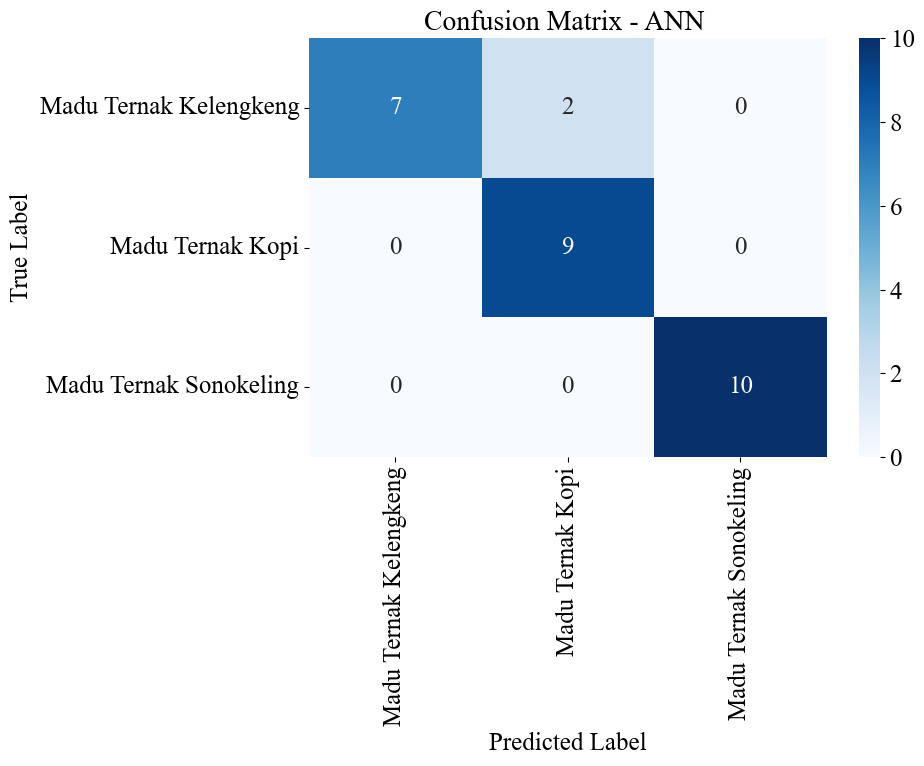


Classification Report (Test Data):
                        precision    recall  f1-score    support
Madu Ternak Kelengkeng   1.000000  0.777778  0.875000   9.000000
Madu Ternak Kopi         0.818182  1.000000  0.900000   9.000000
Madu Ternak Sonokeling   1.000000  1.000000  1.000000  10.000000
accuracy                 0.928571  0.928571  0.928571   0.928571
macro avg                0.939394  0.925926  0.925000  28.000000
weighted avg             0.941558  0.928571  0.927679  28.000000

Classification Report (Train Data):
                        precision  recall  f1-score  support
Madu Ternak Kelengkeng        1.0     1.0       1.0     22.0
Madu Ternak Kopi              1.0     1.0       1.0     22.0
Madu Ternak Sonokeling        1.0     1.0       1.0     21.0
accuracy                      1.0     1.0       1.0      1.0
macro avg                     1.0     1.0       1.0     65.0
weighted avg                  1.0     1.0       1.0     65.0

Evaluating RF model...

Model Performance Co

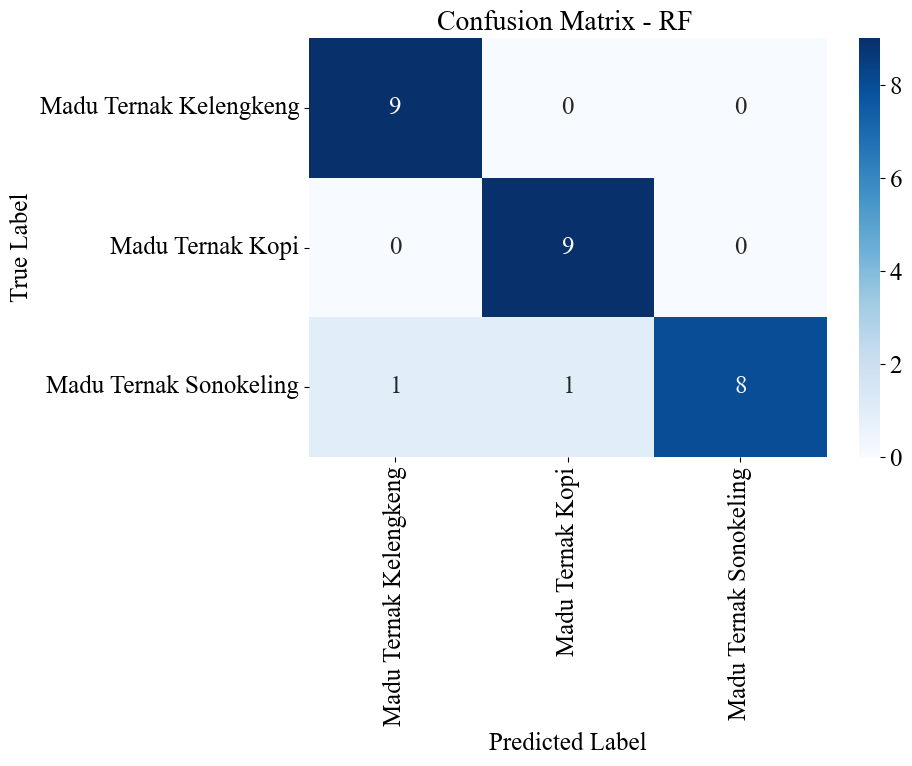


Classification Report (Test Data):
                        precision    recall  f1-score    support
Madu Ternak Kelengkeng   0.900000  1.000000  0.947368   9.000000
Madu Ternak Kopi         0.900000  1.000000  0.947368   9.000000
Madu Ternak Sonokeling   1.000000  0.800000  0.888889  10.000000
accuracy                 0.928571  0.928571  0.928571   0.928571
macro avg                0.933333  0.933333  0.927875  28.000000
weighted avg             0.935714  0.928571  0.926483  28.000000

Classification Report (Train Data):
                        precision  recall  f1-score  support
Madu Ternak Kelengkeng        1.0     1.0       1.0     22.0
Madu Ternak Kopi              1.0     1.0       1.0     22.0
Madu Ternak Sonokeling        1.0     1.0       1.0     21.0
accuracy                      1.0     1.0       1.0      1.0
macro avg                     1.0     1.0       1.0     65.0
weighted avg                  1.0     1.0       1.0     65.0

Evaluating SVM model...

Model Performance C

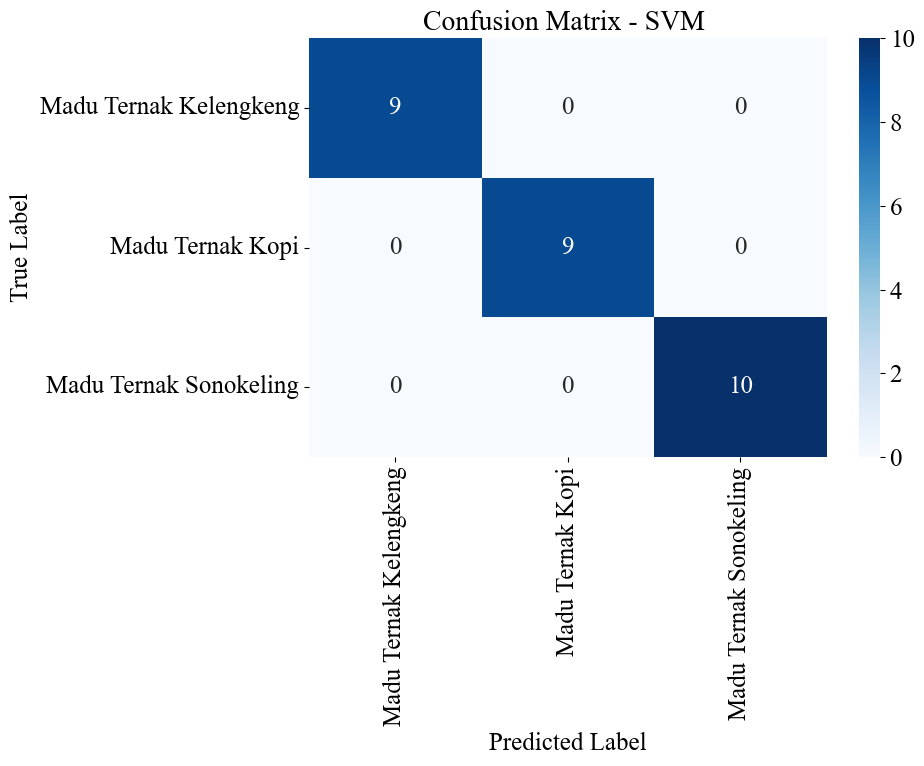


Classification Report (Test Data):
                        precision  recall  f1-score  support
Madu Ternak Kelengkeng        1.0     1.0       1.0      9.0
Madu Ternak Kopi              1.0     1.0       1.0      9.0
Madu Ternak Sonokeling        1.0     1.0       1.0     10.0
accuracy                      1.0     1.0       1.0      1.0
macro avg                     1.0     1.0       1.0     28.0
weighted avg                  1.0     1.0       1.0     28.0

Classification Report (Train Data):
                        precision    recall  f1-score    support
Madu Ternak Kelengkeng   1.000000  0.954545  0.976744  22.000000
Madu Ternak Kopi         1.000000  0.954545  0.976744  22.000000
Madu Ternak Sonokeling   0.913043  1.000000  0.954545  21.000000
accuracy                 0.969231  0.969231  0.969231   0.969231
macro avg                0.971014  0.969697  0.969345  65.000000
weighted avg             0.971906  0.969231  0.969572  65.000000

Honey Analysis Workflow Completed.
Results s

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import time
import requests
import os
import joblib
from datetime import datetime
import random

nama = 'Ternak_'
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

class HoneyAnalysis:
    def __init__(self, data_path=None, from_api=True, api_url="https://madu.software/get_sensor_data/"):
        self.data_path = data_path
        self.from_api = from_api
        self.api_url = api_url
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.class_names = None
        self.label_encoder = None
        self.scaler = None
        self.cv = 5

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        self.results_dir = f"/content/drive/MyDrive/Kuliah/TA/ML/OT/{nama}honey_analysis_results"
        os.makedirs(self.results_dir, exist_ok=True)

        self.ann_best_params = None
        self.rf_best_params = None
        self.svm_best_params = None

        self._load_data()

    def _load_data(self):
        if self.from_api:
            print("Fetching data from API...")
            response = requests.get(self.api_url)
            if response.status_code == 200:
                self.data = pd.DataFrame(response.json())
                print("Data fetched successfully!")
            else:
                print(f"Error fetching data. Status code: {response.status_code}")
                return
        else:
            print(f"Loading data from {self.data_path}...")
            if self.data_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.data_path)
            elif self.data_path.endswith('.json'):
                self.data = pd.read_json(self.data_path)
            else:
                print("Unsupported file format. Please use .xlsx or .json")
                return
            print("Data loaded successfully!")

        honey_types = [
            # 'Madu Kelenceng_itama_4mL', 'Madu Kelenceng_mauni_4mL',
            'Madu Ternak_kopi_4mL', 'Madu Ternak_Sonokeling_4mL', 'Madu Ternak_Kelengkeng_4mL',
            # 'Madu Hutan_Bangka_4mL', 'Madu Hutan_Sumbawa_4mL', 'Madu Hutan_Jambi_4mL', 'Madu Hutan_Riau_4mL'
        ]
        self.data = self.data[self.data['name'].isin(honey_types)]
        print(f"Data filtered to {len(self.data)} samples.")

    def preprocess_data(self, test_size=0.2, random_state=RANDOM_SEED, apply_pca=False, n_components=10):
        print("Preprocessing data...")
        self.feature_names = [col for col in self.data.columns if col.startswith(('uv_', 'vis_', 'nir_'))]
        X = self.data[self.feature_names]
        y = self.data['name']
        y = y.str.replace('mauni', 'Mauni').str.replace('itama', 'Itama').str.replace('kopi', 'Kopi').str.replace('_', ' ').str.replace('4mL', '').str.strip()
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.class_names = self.label_encoder.classes_
        print(f"Classes: {self.class_names}")

        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X)

        X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
        )

        if apply_pca:
            print(f"Applying PCA with {n_components} components...")
            pca = PCA(n_components=n_components, random_state=random_state)
            X_train_scaled = pca.fit_transform(X_train_scaled)
            X_test_scaled = pca.transform(X_test_scaled)
            explained_variance = np.sum(pca.explained_variance_ratio_)
            print(f"PCA explained variance: {explained_variance:.4f}")
            self.feature_names = [f"PC{i+1}" for i in range(n_components)]

        self.X_train = X_train_scaled
        self.X_test = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        self.X = np.vstack((X_train_scaled, X_test_scaled))
        self.y = np.concatenate((y_train, y_test))

        print(f"Data preprocessed. Training set: {self.X_train.shape}, Test set: {self.X_test.shape}")
        print("\nClass distribution:")
        for idx, class_name in enumerate(self.class_names):
            train_count = np.sum(y_train == idx)
            test_count = np.sum(y_test == idx)
            print(f"  {class_name}: {train_count} (train), {test_count} (test)")

        pd.DataFrame({
            'Class': self.class_names,
            'Train Count': [np.sum(y_train == i) for i in range(len(self.class_names))],
            'Test Count': [np.sum(y_test == i) for i in range(len(self.class_names))],
            'Total Count': [np.sum(y_encoded == i) for i in range(len(self.class_names))]
        }).to_csv(os.path.join(self.results_dir, f'{nama}data_summary.csv'), index=False)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def search_hyperparameters(self, model_type='ANN', cv=5, n_jobs=-1):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print(f"Searching hyperparameters for {model_type}...")

        if model_type == 'ANN':
            param_grid = {
                "hidden_layer_sizes": [
                    (58,), (116,), (58,10), (116,10),
                    (58,58), (116,58), (58,58,58), (116,116,116)
                ],
                "solver": ['lbfgs', 'sgd'],
                "activation": ['identity', 'tanh', 'relu'],
                "alpha": [0.0001, 0.001, 0.01],
            }
            model = MLPClassifier(
                learning_rate_init=0.01,
                batch_size=32,
                max_iter=200,
                random_state=RANDOM_SEED,
                early_stopping=True,
                n_iter_no_change=10
            )
        elif model_type == 'RF':
            param_grid = {
                "n_estimators": [100, 200, 300, 400, 500],
                "max_depth": [None, 10, 20, 30],
            }
            model = RandomForestClassifier(
                max_features='sqrt',
                min_samples_split=2,
                min_samples_leaf=1,
                bootstrap=True,
                random_state=RANDOM_SEED,
                n_jobs=n_jobs
            )
        elif model_type == 'SVM':
            param_grid = {
                "kernel": ["linear", "rbf", "poly"],
                "C": [0.1, 1, 10, 100, 1000],
                "gamma": [1, 0.1, 0.01, 0.001]
            }
            model = SVC(probability=True, random_state=RANDOM_SEED)
        else:
            raise ValueError("model_type must be one of 'ANN', 'RF', 'SVM'.")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='accuracy',
            n_jobs=n_jobs,
            cv=cv,
            verbose=2
        )
        grid_search.fit(self.X_train, self.y_train)
        print(f"Best parameters for {model_type}: {grid_search.best_params_}")
        print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

        results_df = pd.DataFrame(grid_search.cv_results_)
        results_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_type}_grid_search_results.csv'), index=False)

        if model_type == 'ANN':
            self.ann_best_params = grid_search.best_params_
        elif model_type == 'RF':
            self.rf_best_params = grid_search.best_params_
        elif model_type == 'SVM':
            self.svm_best_params = grid_search.best_params_

        return grid_search.best_params_

    def train_ann(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training ANN model (scikit-learn MLPClassifier)...")
        start_time = time.time()
        params = self.ann_best_params if self.ann_best_params else {
            "hidden_layer_sizes": (116, 116, 116),
            "activation": "tanh",
            "solver": "adam",
            "alpha": 0.0001
        }
        ann_model = MLPClassifier(
            hidden_layer_sizes=params.get("hidden_layer_sizes", (116, 116, 116)),
            activation=params.get("activation", 'tanh'),
            solver=params.get("solver", 'adam'),
            alpha=params.get("alpha", 0.0001),
            learning_rate_init=0.01,
            batch_size=32,
            max_iter=200,
            random_state=RANDOM_SEED,
            early_stopping=True,
            n_iter_no_change=10,
            verbose=True
        )
        ann_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"ANN model trained in {training_time:.2f} seconds")
        joblib.dump(ann_model, os.path.join(self.results_dir, f'{nama}ann_model.pkl'))
        return ann_model

    def train_random_forest(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training Random Forest model...")
        start_time = time.time()
        params = self.rf_best_params if self.rf_best_params else {
            "n_estimators": 300,
            "max_depth": None
        }
        rf_model = RandomForestClassifier(
            n_estimators=params.get("n_estimators", 300),
            max_features='sqrt',
            max_depth=params.get("max_depth", None),
            min_samples_split=2,
            min_samples_leaf=1,
            bootstrap=True,
            random_state=RANDOM_SEED,
            n_jobs=-1
        )
        rf_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"Random Forest model trained in {training_time:.2f} seconds")
        joblib.dump(rf_model, os.path.join(self.results_dir, f'{nama}random_forest_model.pkl'))
        return rf_model

    def train_svm(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training SVM model...")
        start_time = time.time()
        params = self.svm_best_params if self.svm_best_params else {
            "kernel": "rbf",
            "C": 1000,
            "gamma": 0.0001
        }
        svm_model = SVC(
            kernel=params.get("kernel", "rbf"),
            C=params.get("C", 1000),
            gamma=params.get("gamma", 0.0001),
            probability=True,
            random_state=RANDOM_SEED
        )
        svm_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"SVM model trained in {training_time:.2f} seconds")
        joblib.dump(svm_model, os.path.join(self.results_dir, f'{nama}svm_model.pkl'))
        return svm_model

    def cross_validate_model(self, model, model_name, n_folds=5):
        print(f"\nCross-validating {model_name}...")
        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)
        scores = cross_validate(
            model, self.X, self.y,
            cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
        )
        print(f"{model_name} CV Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
        print(f"{model_name} CV F1 Score: {scores['test_f1_weighted'].mean():.4f} ± {scores['test_f1_weighted'].std():.4f}")

        cv_results = pd.DataFrame({
            'fold': np.arange(1, n_folds+1),
            'accuracy': scores['test_accuracy'],
            'precision': scores['test_precision_weighted'],
            'recall': scores['test_recall_weighted'],
            'f1': scores['test_f1_weighted'],
        })
        cv_results.to_csv(os.path.join(self.results_dir, f"{nama}{model_name.lower()}_cv_folds.csv"), index=False)
        # Return mean and std for summary
        return {
            'model': model_name,
            'accuracy_mean': scores['test_accuracy'].mean(),
            'accuracy_std': scores['test_accuracy'].std(),
            'precision_mean': scores['test_precision_weighted'].mean(),
            'precision_std': scores['test_precision_weighted'].std(),
            'recall_mean': scores['test_recall_weighted'].mean(),
            'recall_std': scores['test_recall_weighted'].std(),
            'f1_mean': scores['test_f1_weighted'].mean(),
            'f1_std': scores['test_f1_weighted'].std()
        }

    def evaluate_model(self, model, model_name):
        print(f"\nEvaluating {model_name} model...")
        y_pred_test = model.predict(self.X_test)
        y_pred_train = model.predict(self.X_train)

        train_accuracy = accuracy_score(self.y_train, y_pred_train)
        train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
        train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
        train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')

        test_accuracy = accuracy_score(self.y_test, y_pred_test)
        test_precision = precision_score(self.y_test, y_pred_test, average='weighted')
        test_recall = recall_score(self.y_test, y_pred_test, average='weighted')
        test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

        print("\nModel Performance Comparison:")
        print(f"{'Metric':<10} {'Training':<10} {'Testing':<10}")
        print("-" * 30)
        print(f"{'Accuracy':<10} {train_accuracy:.4f}     {test_accuracy:.4f}")
        print(f"{'Precision':<10} {train_precision:.4f}     {test_precision:.4f}")
        print(f"{'Recall':<10} {train_recall:.4f}     {test_recall:.4f}")
        print(f"{'F1 Score':<10} {train_f1:.4f}     {test_f1:.4f}")

        cm = confusion_matrix(self.y_test, y_pred_test)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=self.class_names,
                 yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name} ')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_confusion_matrix.png'))
        plt.show()

        test_report = classification_report(self.y_test, y_pred_test, target_names=self.class_names, output_dict=True)
        test_report_df = pd.DataFrame(test_report).transpose()
        print("\nClassification Report (Test Data):")
        print(test_report_df)
        test_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_classification_report.csv'))

        train_report = classification_report(self.y_train, y_pred_train, target_names=self.class_names, output_dict=True)
        train_report_df = pd.DataFrame(train_report).transpose()
        print("\nClassification Report (Train Data):")
        print(train_report_df)
        train_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_train_classification_report.csv'))

        metrics_dict = {
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1
        }

        metrics_df = pd.DataFrame([metrics_dict])
        metrics_file = os.path.join(self.results_dir, f'{nama}model_metrics.csv')

        if os.path.exists(metrics_file):
            existing_metrics = pd.read_csv(metrics_file)
            updated_metrics = pd.concat([existing_metrics, metrics_df], ignore_index=True)
            updated_metrics.to_csv(metrics_file, index=False)
        else:
            metrics_df.to_csv(metrics_file, index=False)

        return metrics_dict

if __name__ == '__main__':
    USE_API = True
    LOCAL_DATA_PATH = 'data/sensor_data.xlsx'
    APPLY_PCA = False
    PCA_COMPONENTS = 10
    TEST_SPLIT_SIZE = 0.3

    print("Starting Honey Analysis Workflow...")
    analyzer = HoneyAnalysis(data_path=LOCAL_DATA_PATH, from_api=USE_API)
    analyzer.preprocess_data(test_size=TEST_SPLIT_SIZE, random_state=RANDOM_SEED,
                             apply_pca=APPLY_PCA, n_components=PCA_COMPONENTS)

    # --- Hyperparameter Search First ---
    print("\n--- Hyperparameter Search: ANN ---")
    analyzer.search_hyperparameters('ANN', cv=5)
    print("\n--- Hyperparameter Search: RF ---")
    analyzer.search_hyperparameters('RF', cv=5)
    print("\n--- Hyperparameter Search: SVM ---")
    analyzer.search_hyperparameters('SVM', cv=5)

    # --- Model Training with Best Hyperparameters ---
    print("\n--- Training Models with Best Hyperparameters ---")
    ann_model = analyzer.train_ann()
    rf_model = analyzer.train_random_forest()
    svm_model = analyzer.train_svm()

    models_dict = {}
    if ann_model:
        models_dict['ANN'] = ann_model
    if rf_model:
        models_dict['RF'] = rf_model
    if svm_model:
        models_dict['SVM'] = svm_model

    # --- Cross Validation Setiap Model, Simpan Rata-Rata ke Satu File ---
    cv_summary = []
    if models_dict:
        print("\n--- Cross Validation Setiap Model ---")
        for model_name, model_instance in models_dict.items():
            cv_result = analyzer.cross_validate_model(model_instance, model_name, n_folds=5)
            cv_summary.append(cv_result)

        # Simpan summary rata-rata ke satu file
        cv_summary_df = pd.DataFrame(cv_summary)
        cv_summary_file = os.path.join(analyzer.results_dir, f"{nama}cv_summary.csv")
        cv_summary_df.to_csv(cv_summary_file, index=False)

        print("\n=== CV Summary ===")
        print(cv_summary_df)

        # Tentukan model terbaik berdasarkan rata-rata f1 tertinggi
        best_model_idx = cv_summary_df['f1_mean'].idxmax()
        best_model_name = cv_summary_df.iloc[best_model_idx]['model']
        best_model_f1 = cv_summary_df.iloc[best_model_idx]['f1_mean']
        print(f"\nModel terbaik berdasarkan rata-rata F1: {best_model_name} (F1 = {best_model_f1:.4f})")

        # --- Evaluasi ---
        print("\n--- Evaluating Models ---")
        for model_name, model_instance in models_dict.items():
            analyzer.evaluate_model(model_instance, model_name)
    else:
        print("\nNo models were trained successfully. Skipping evaluation.")

    print("\nHoney Analysis Workflow Completed.")
    if hasattr(analyzer, 'results_dir') and analyzer.results_dir:
         print(f"Results saved in: {os.path.abspath(analyzer.results_dir)}")

# Kelenceng

Starting Honey Analysis Workflow...
Fetching data from API...
Data fetched successfully!
Data filtered to 162 samples.
Preprocessing data...
Classes: ['Madu Kelenceng Itama' 'Madu Kelenceng Mauni']
Data preprocessed. Training set: (113, 18), Test set: (49, 18)

Class distribution:
  Madu Kelenceng Itama: 56 (train), 25 (test)
  Madu Kelenceng Mauni: 57 (train), 24 (test)

--- Hyperparameter Search: ANN ---
Searching hyperparameters for ANN...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for ANN: {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (58,), 'solver': 'lbfgs'}
Best cross-validated accuracy: 1.0000

--- Hyperparameter Search: RF ---
Searching hyperparameters for RF...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for RF: {'max_depth': None, 'n_estimators': 100}
Best cross-validated accuracy: 0.9826

--- Hyperparameter Search: SVM ---
Searching hyperparameters for SVM...
Fitting 5 folds for each o

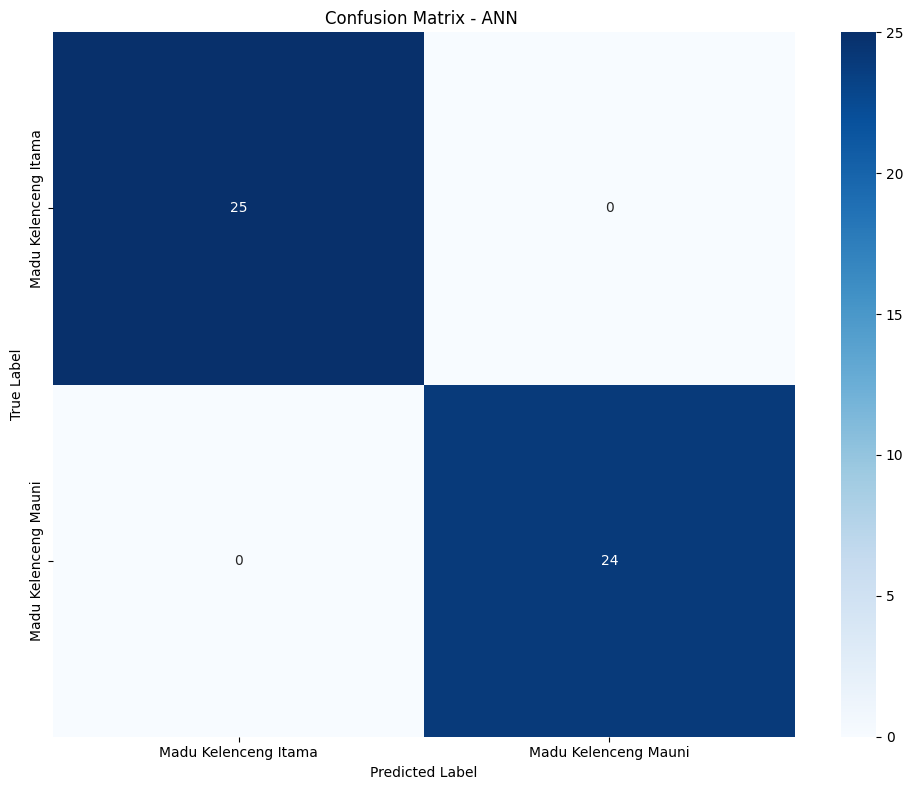


Classification Report (Test Data):
                      precision  recall  f1-score  support
Madu Kelenceng Itama        1.0     1.0       1.0     25.0
Madu Kelenceng Mauni        1.0     1.0       1.0     24.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0     49.0
weighted avg                1.0     1.0       1.0     49.0

Classification Report (Train Data):
                      precision  recall  f1-score  support
Madu Kelenceng Itama        1.0     1.0       1.0     56.0
Madu Kelenceng Mauni        1.0     1.0       1.0     57.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0    113.0
weighted avg                1.0     1.0       1.0    113.0

Evaluating RF model...

Model Performance Comparison:
Metric     Training   Testing   
------------------------------
Accuracy   1.0000     1.0000
Precision  1.0000     1.0000
Recall     1.0000     1.0000
F1 Score   1.

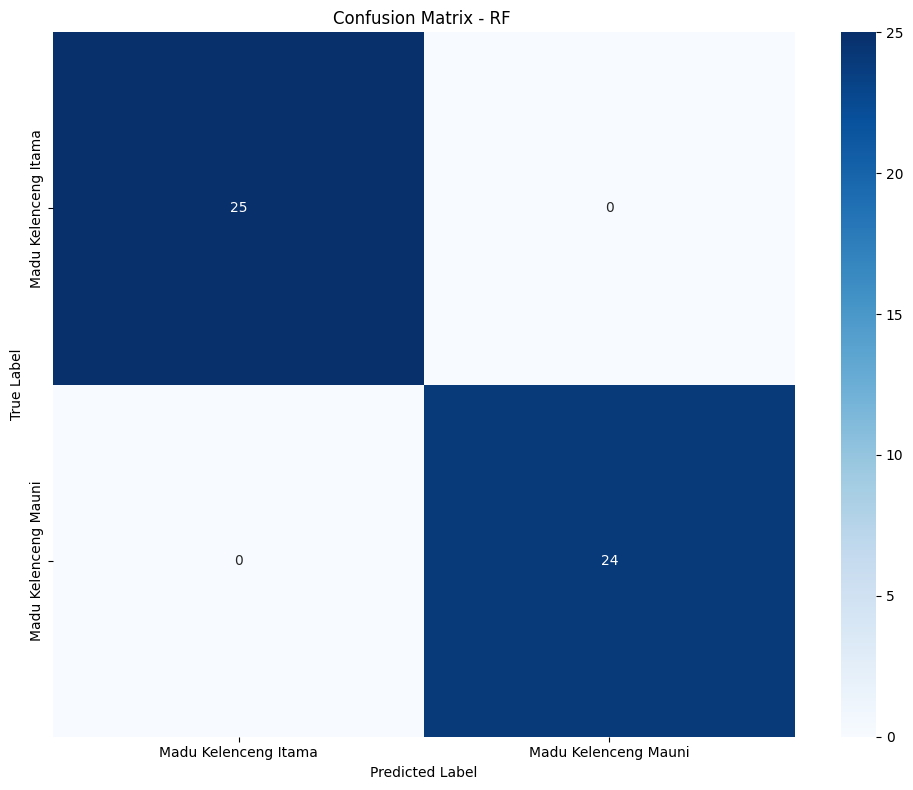


Classification Report (Test Data):
                      precision  recall  f1-score  support
Madu Kelenceng Itama        1.0     1.0       1.0     25.0
Madu Kelenceng Mauni        1.0     1.0       1.0     24.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0     49.0
weighted avg                1.0     1.0       1.0     49.0

Classification Report (Train Data):
                      precision  recall  f1-score  support
Madu Kelenceng Itama        1.0     1.0       1.0     56.0
Madu Kelenceng Mauni        1.0     1.0       1.0     57.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0    113.0
weighted avg                1.0     1.0       1.0    113.0

Evaluating SVM model...

Model Performance Comparison:
Metric     Training   Testing   
------------------------------
Accuracy   1.0000     1.0000
Precision  1.0000     1.0000
Recall     1.0000     1.0000
F1 Score   1

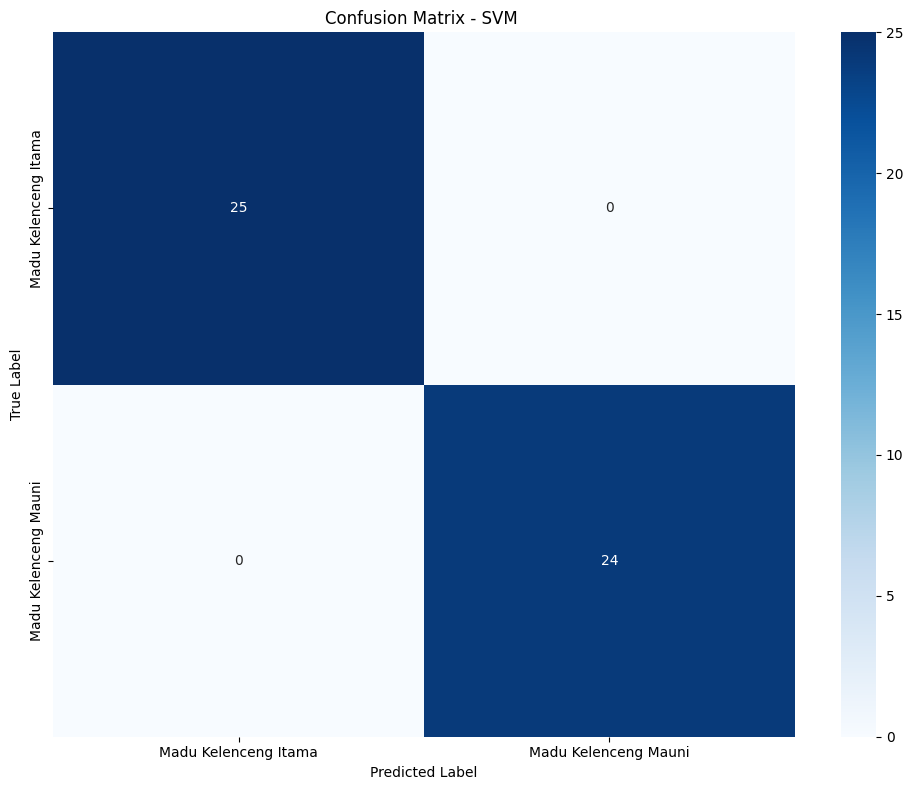


Classification Report (Test Data):
                      precision  recall  f1-score  support
Madu Kelenceng Itama        1.0     1.0       1.0     25.0
Madu Kelenceng Mauni        1.0     1.0       1.0     24.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0     49.0
weighted avg                1.0     1.0       1.0     49.0

Classification Report (Train Data):
                      precision  recall  f1-score  support
Madu Kelenceng Itama        1.0     1.0       1.0     56.0
Madu Kelenceng Mauni        1.0     1.0       1.0     57.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0    113.0
weighted avg                1.0     1.0       1.0    113.0

Honey Analysis Workflow Completed.
Results saved in: /content/drive/MyDrive/Kuliah/TA/ML/OT/Kelenceng_honey_analysis_results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import time
import requests
import os
import joblib
from datetime import datetime
import random

nama = 'Kelenceng_'
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

class HoneyAnalysis:
    def __init__(self, data_path=None, from_api=True, api_url="https://madu.software/get_sensor_data/"):
        self.data_path = data_path
        self.from_api = from_api
        self.api_url = api_url
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.class_names = None
        self.label_encoder = None
        self.scaler = None
        self.cv = 5

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        self.results_dir = f"/content/drive/MyDrive/Kuliah/TA/ML/OT/{nama}honey_analysis_results"
        os.makedirs(self.results_dir, exist_ok=True)

        self.ann_best_params = None
        self.rf_best_params = None
        self.svm_best_params = None

        self._load_data()

    def _load_data(self):
        if self.from_api:
            print("Fetching data from API...")
            response = requests.get(self.api_url)
            if response.status_code == 200:
                self.data = pd.DataFrame(response.json())
                print("Data fetched successfully!")
            else:
                print(f"Error fetching data. Status code: {response.status_code}")
                return
        else:
            print(f"Loading data from {self.data_path}...")
            if self.data_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.data_path)
            elif self.data_path.endswith('.json'):
                self.data = pd.read_json(self.data_path)
            else:
                print("Unsupported file format. Please use .xlsx or .json")
                return
            print("Data loaded successfully!")

        honey_types = [
            'Madu Kelenceng_itama_4mL', 'Madu Kelenceng_mauni_4mL',
            # 'Madu Ternak_kopi_4mL', 'Madu Ternak_Sonokeling_4mL', 'Madu Ternak_Kelengkeng_4mL',
            # 'Madu Hutan_Bangka_4mL', 'Madu Hutan_Sumbawa_4mL', 'Madu Hutan_Jambi_4mL', 'Madu Hutan_Riau_4mL'
        ]
        self.data = self.data[self.data['name'].isin(honey_types)]
        print(f"Data filtered to {len(self.data)} samples.")

    def preprocess_data(self, test_size=0.2, random_state=RANDOM_SEED, apply_pca=False, n_components=10):
        print("Preprocessing data...")
        self.feature_names = [col for col in self.data.columns if col.startswith(('uv_', 'vis_', 'nir_'))]
        X = self.data[self.feature_names]
        y = self.data['name']
        y = y.str.replace('mauni', 'Mauni').str.replace('itama', 'Itama').str.replace('kopi', 'Kopi').str.replace('_', ' ').str.replace('4mL', '').str.strip()
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.class_names = self.label_encoder.classes_
        print(f"Classes: {self.class_names}")

        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X)

        X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
        )

        if apply_pca:
            print(f"Applying PCA with {n_components} components...")
            pca = PCA(n_components=n_components, random_state=random_state)
            X_train_scaled = pca.fit_transform(X_train_scaled)
            X_test_scaled = pca.transform(X_test_scaled)
            explained_variance = np.sum(pca.explained_variance_ratio_)
            print(f"PCA explained variance: {explained_variance:.4f}")
            self.feature_names = [f"PC{i+1}" for i in range(n_components)]

        self.X_train = X_train_scaled
        self.X_test = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        self.X = np.vstack((X_train_scaled, X_test_scaled))
        self.y = np.concatenate((y_train, y_test))

        print(f"Data preprocessed. Training set: {self.X_train.shape}, Test set: {self.X_test.shape}")
        print("\nClass distribution:")
        for idx, class_name in enumerate(self.class_names):
            train_count = np.sum(y_train == idx)
            test_count = np.sum(y_test == idx)
            print(f"  {class_name}: {train_count} (train), {test_count} (test)")

        pd.DataFrame({
            'Class': self.class_names,
            'Train Count': [np.sum(y_train == i) for i in range(len(self.class_names))],
            'Test Count': [np.sum(y_test == i) for i in range(len(self.class_names))],
            'Total Count': [np.sum(y_encoded == i) for i in range(len(self.class_names))]
        }).to_csv(os.path.join(self.results_dir, f'{nama}data_summary.csv'), index=False)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def search_hyperparameters(self, model_type='ANN', cv=5, n_jobs=-1):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print(f"Searching hyperparameters for {model_type}...")

        if model_type == 'ANN':
            param_grid = {
                "hidden_layer_sizes": [
                    (58,), (116,), (58,10), (116,10),
                    (58,58), (116,58), (58,58,58), (116,116,116)
                ],
                "solver": ['lbfgs', 'sgd'],
                "activation": ['identity', 'tanh', 'relu'],
                "alpha": [0.0001, 0.001, 0.01],
            }
            model = MLPClassifier(
                learning_rate_init=0.01,
                batch_size=32,
                max_iter=200,
                random_state=RANDOM_SEED,
                early_stopping=True,
                n_iter_no_change=10
            )
        elif model_type == 'RF':
            param_grid = {
                "n_estimators": [100, 200, 300, 400, 500],
                "max_depth": [None, 10, 20, 30],
            }
            model = RandomForestClassifier(
                max_features='sqrt',
                min_samples_split=2,
                min_samples_leaf=1,
                bootstrap=True,
                random_state=RANDOM_SEED,
                n_jobs=n_jobs
            )
        elif model_type == 'SVM':
            param_grid = {
                "kernel": ["linear", "rbf", "poly"],
                "C": [0.1, 1, 10, 100, 1000],
                "gamma": [1, 0.1, 0.01, 0.001]
            }
            model = SVC(probability=True, random_state=RANDOM_SEED)
        else:
            raise ValueError("model_type must be one of 'ANN', 'RF', 'SVM'.")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='accuracy',
            n_jobs=n_jobs,
            cv=cv,
            verbose=2
        )
        grid_search.fit(self.X_train, self.y_train)
        print(f"Best parameters for {model_type}: {grid_search.best_params_}")
        print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

        results_df = pd.DataFrame(grid_search.cv_results_)
        results_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_type}_grid_search_results.csv'), index=False)

        if model_type == 'ANN':
            self.ann_best_params = grid_search.best_params_
        elif model_type == 'RF':
            self.rf_best_params = grid_search.best_params_
        elif model_type == 'SVM':
            self.svm_best_params = grid_search.best_params_

        return grid_search.best_params_

    def train_ann(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training ANN model (scikit-learn MLPClassifier)...")
        start_time = time.time()
        params = self.ann_best_params if self.ann_best_params else {
            "hidden_layer_sizes": (116, 116, 116),
            "activation": "tanh",
            "solver": "adam",
            "alpha": 0.0001
        }
        ann_model = MLPClassifier(
            hidden_layer_sizes=params.get("hidden_layer_sizes", (116, 116, 116)),
            activation=params.get("activation", 'tanh'),
            solver=params.get("solver", 'adam'),
            alpha=params.get("alpha", 0.0001),
            learning_rate_init=0.01,
            batch_size=32,
            max_iter=200,
            random_state=RANDOM_SEED,
            early_stopping=True,
            n_iter_no_change=10,
            verbose=True
        )
        ann_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"ANN model trained in {training_time:.2f} seconds")
        joblib.dump(ann_model, os.path.join(self.results_dir, f'{nama}ann_model.pkl'))
        return ann_model

    def train_random_forest(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training Random Forest model...")
        start_time = time.time()
        params = self.rf_best_params if self.rf_best_params else {
            "n_estimators": 300,
            "max_depth": None
        }
        rf_model = RandomForestClassifier(
            n_estimators=params.get("n_estimators", 300),
            max_features='sqrt',
            max_depth=params.get("max_depth", None),
            min_samples_split=2,
            min_samples_leaf=1,
            bootstrap=True,
            random_state=RANDOM_SEED,
            n_jobs=-1
        )
        rf_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"Random Forest model trained in {training_time:.2f} seconds")
        joblib.dump(rf_model, os.path.join(self.results_dir, f'{nama}random_forest_model.pkl'))
        return rf_model

    def train_svm(self):
        if self.X_train is None or self.y_train is None:
            print("Data not preprocessed. Run preprocess_data() first.")
            return None

        print("Training SVM model...")
        start_time = time.time()
        params = self.svm_best_params if self.svm_best_params else {
            "kernel": "rbf",
            "C": 1000,
            "gamma": 0.0001
        }
        svm_model = SVC(
            kernel=params.get("kernel", "rbf"),
            C=params.get("C", 1000),
            gamma=params.get("gamma", 0.0001),
            probability=True,
            random_state=RANDOM_SEED
        )
        svm_model.fit(self.X_train, self.y_train)
        training_time = time.time() - start_time
        print(f"SVM model trained in {training_time:.2f} seconds")
        joblib.dump(svm_model, os.path.join(self.results_dir, f'{nama}svm_model.pkl'))
        return svm_model

    def cross_validate_model(self, model, model_name, n_folds=5):
        print(f"\nCross-validating {model_name}...")
        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)
        scores = cross_validate(
            model, self.X, self.y,
            cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
        )
        print(f"{model_name} CV Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
        print(f"{model_name} CV F1 Score: {scores['test_f1_weighted'].mean():.4f} ± {scores['test_f1_weighted'].std():.4f}")

        cv_results = pd.DataFrame({
            'fold': np.arange(1, n_folds+1),
            'accuracy': scores['test_accuracy'],
            'precision': scores['test_precision_weighted'],
            'recall': scores['test_recall_weighted'],
            'f1': scores['test_f1_weighted'],
        })
        cv_results.to_csv(os.path.join(self.results_dir, f"{nama}{model_name.lower()}_cv_folds.csv"), index=False)
        # Return mean and std for summary
        return {
            'model': model_name,
            'accuracy_mean': scores['test_accuracy'].mean(),
            'accuracy_std': scores['test_accuracy'].std(),
            'precision_mean': scores['test_precision_weighted'].mean(),
            'precision_std': scores['test_precision_weighted'].std(),
            'recall_mean': scores['test_recall_weighted'].mean(),
            'recall_std': scores['test_recall_weighted'].std(),
            'f1_mean': scores['test_f1_weighted'].mean(),
            'f1_std': scores['test_f1_weighted'].std()
        }

    def evaluate_model(self, model, model_name):
        print(f"\nEvaluating {model_name} model...")
        y_pred_test = model.predict(self.X_test)
        y_pred_train = model.predict(self.X_train)

        train_accuracy = accuracy_score(self.y_train, y_pred_train)
        train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
        train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
        train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')

        test_accuracy = accuracy_score(self.y_test, y_pred_test)
        test_precision = precision_score(self.y_test, y_pred_test, average='weighted')
        test_recall = recall_score(self.y_test, y_pred_test, average='weighted')
        test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

        print("\nModel Performance Comparison:")
        print(f"{'Metric':<10} {'Training':<10} {'Testing':<10}")
        print("-" * 30)
        print(f"{'Accuracy':<10} {train_accuracy:.4f}     {test_accuracy:.4f}")
        print(f"{'Precision':<10} {train_precision:.4f}     {test_precision:.4f}")
        print(f"{'Recall':<10} {train_recall:.4f}     {test_recall:.4f}")
        print(f"{'F1 Score':<10} {train_f1:.4f}     {test_f1:.4f}")

        cm = confusion_matrix(self.y_test, y_pred_test)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=self.class_names,
                 yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name} ')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_confusion_matrix.png'))
        plt.show()

        test_report = classification_report(self.y_test, y_pred_test, target_names=self.class_names, output_dict=True)
        test_report_df = pd.DataFrame(test_report).transpose()
        print("\nClassification Report (Test Data):")
        print(test_report_df)
        test_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_classification_report.csv'))

        train_report = classification_report(self.y_train, y_pred_train, target_names=self.class_names, output_dict=True)
        train_report_df = pd.DataFrame(train_report).transpose()
        print("\nClassification Report (Train Data):")
        print(train_report_df)
        train_report_df.to_csv(os.path.join(self.results_dir, f'{nama}{model_name.lower()}_train_classification_report.csv'))

        metrics_dict = {
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1
        }

        metrics_df = pd.DataFrame([metrics_dict])
        metrics_file = os.path.join(self.results_dir, f'{nama}model_metrics.csv')

        if os.path.exists(metrics_file):
            existing_metrics = pd.read_csv(metrics_file)
            updated_metrics = pd.concat([existing_metrics, metrics_df], ignore_index=True)
            updated_metrics.to_csv(metrics_file, index=False)
        else:
            metrics_df.to_csv(metrics_file, index=False)

        return metrics_dict

if __name__ == '__main__':
    USE_API = True
    LOCAL_DATA_PATH = 'data/sensor_data.xlsx'
    APPLY_PCA = False
    PCA_COMPONENTS = 10
    TEST_SPLIT_SIZE = 0.3

    print("Starting Honey Analysis Workflow...")
    analyzer = HoneyAnalysis(data_path=LOCAL_DATA_PATH, from_api=USE_API)
    analyzer.preprocess_data(test_size=TEST_SPLIT_SIZE, random_state=RANDOM_SEED,
                             apply_pca=APPLY_PCA, n_components=PCA_COMPONENTS)

    # --- Hyperparameter Search First ---
    print("\n--- Hyperparameter Search: ANN ---")
    analyzer.search_hyperparameters('ANN', cv=5)
    print("\n--- Hyperparameter Search: RF ---")
    analyzer.search_hyperparameters('RF', cv=5)
    print("\n--- Hyperparameter Search: SVM ---")
    analyzer.search_hyperparameters('SVM', cv=5)

    # --- Model Training with Best Hyperparameters ---
    print("\n--- Training Models with Best Hyperparameters ---")
    ann_model = analyzer.train_ann()
    rf_model = analyzer.train_random_forest()
    svm_model = analyzer.train_svm()

    models_dict = {}
    if ann_model:
        models_dict['ANN'] = ann_model
    if rf_model:
        models_dict['RF'] = rf_model
    if svm_model:
        models_dict['SVM'] = svm_model

    # --- Cross Validation Setiap Model, Simpan Rata-Rata ke Satu File ---
    cv_summary = []
    if models_dict:
        print("\n--- Cross Validation Setiap Model ---")
        for model_name, model_instance in models_dict.items():
            cv_result = analyzer.cross_validate_model(model_instance, model_name, n_folds=5)
            cv_summary.append(cv_result)

        # Simpan summary rata-rata ke satu file
        cv_summary_df = pd.DataFrame(cv_summary)
        cv_summary_file = os.path.join(analyzer.results_dir, f"{nama}cv_summary.csv")
        cv_summary_df.to_csv(cv_summary_file, index=False)

        print("\n=== CV Summary ===")
        print(cv_summary_df)

        # Tentukan model terbaik berdasarkan rata-rata f1 tertinggi
        best_model_idx = cv_summary_df['f1_mean'].idxmax()
        best_model_name = cv_summary_df.iloc[best_model_idx]['model']
        best_model_f1 = cv_summary_df.iloc[best_model_idx]['f1_mean']
        print(f"\nModel terbaik berdasarkan rata-rata F1: {best_model_name} (F1 = {best_model_f1:.4f})")

        # --- Evaluasi ---
        print("\n--- Evaluating Models ---")
        for model_name, model_instance in models_dict.items():
            analyzer.evaluate_model(model_instance, model_name)
    else:
        print("\nNo models were trained successfully. Skipping evaluation.")

    print("\nHoney Analysis Workflow Completed.")
    if hasattr(analyzer, 'results_dir') and analyzer.results_dir:
         print(f"Results saved in: {os.path.abspath(analyzer.results_dir)}")

# plot

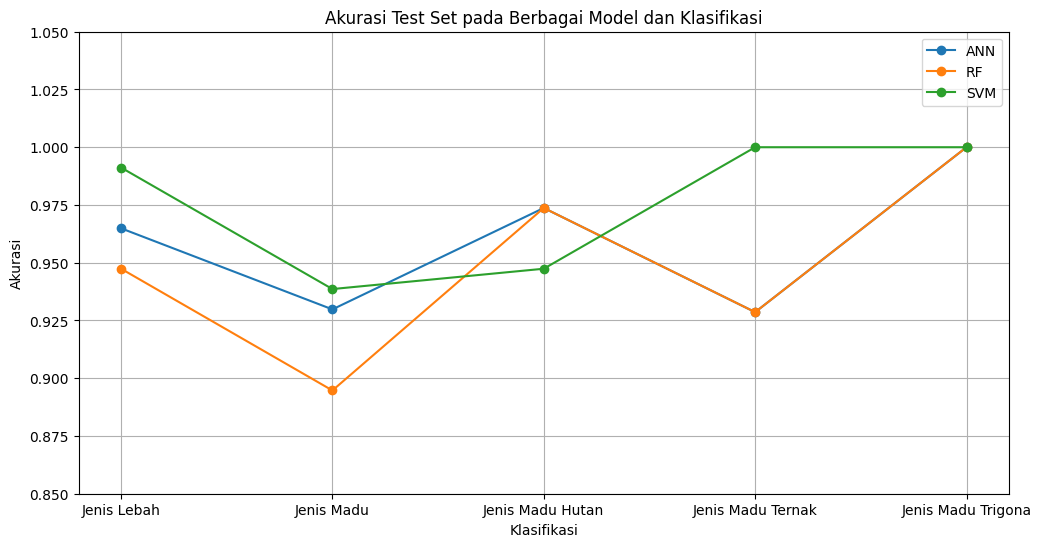

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data di bawah ini adalah contoh, silakan sesuaikan dengan tabel aslinya
data = {
    'Klasifikasi': [
        'Jenis Lebah', 'Jenis Lebah', 'Jenis Lebah',
        'Jenis Madu', 'Jenis Madu', 'Jenis Madu',
        'Jenis Madu Hutan', 'Jenis Madu Hutan', 'Jenis Madu Hutan',
        'Jenis Madu Ternak', 'Jenis Madu Ternak', 'Jenis Madu Ternak',
        'Jenis Madu Trigona', 'Jenis Madu Trigona', 'Jenis Madu Trigona'
    ],
    'Model': ['ANN', 'RF', 'SVM']*5,
    'Akurasi': [0.9649, 0.9474, 0.9912, 0.9298, 0.8947, 0.9386, 0.9737, 0.9737, 0.9474, 0.9286, 0.9286, 1.0, 1.0, 1.0, 1.0],
    'Presisi': [0.9652, 0.9547, 0.9915, 0.9282, 0.8908, 0.9407, 0.9763, 0.9763, 0.9474, 0.9416, 0.9357, 1.0, 1.0, 1.0, 1.0],
    'Recall': [0.9649, 0.9474, 0.9912, 0.9298, 0.8947, 0.9386, 0.9737, 0.9737, 0.9474, 0.9286, 0.9286, 1.0, 1.0, 1.0, 1.0],
    'F1': [0.9647, 0.9462, 0.9912, 0.9275, 0.8818, 0.9383, 0.9736, 0.9736, 0.9472, 0.9277, 0.9265, 1.0, 1.0, 1.0, 1.0]
}

df = pd.DataFrame(data)

# Plot Akurasi Test Set
plt.figure(figsize=(12, 6))
for model in ['ANN', 'RF', 'SVM']:
    subset = df[df['Model'] == model]
    plt.plot(subset['Klasifikasi'], subset['Akurasi'], marker='o', label=model)
plt.title('Akurasi Test Set pada Berbagai Model dan Klasifikasi')
plt.ylabel('Akurasi')
plt.xlabel('Klasifikasi')
plt.ylim(0.85, 1.05)
plt.legend()
plt.grid(True)
plt.show()

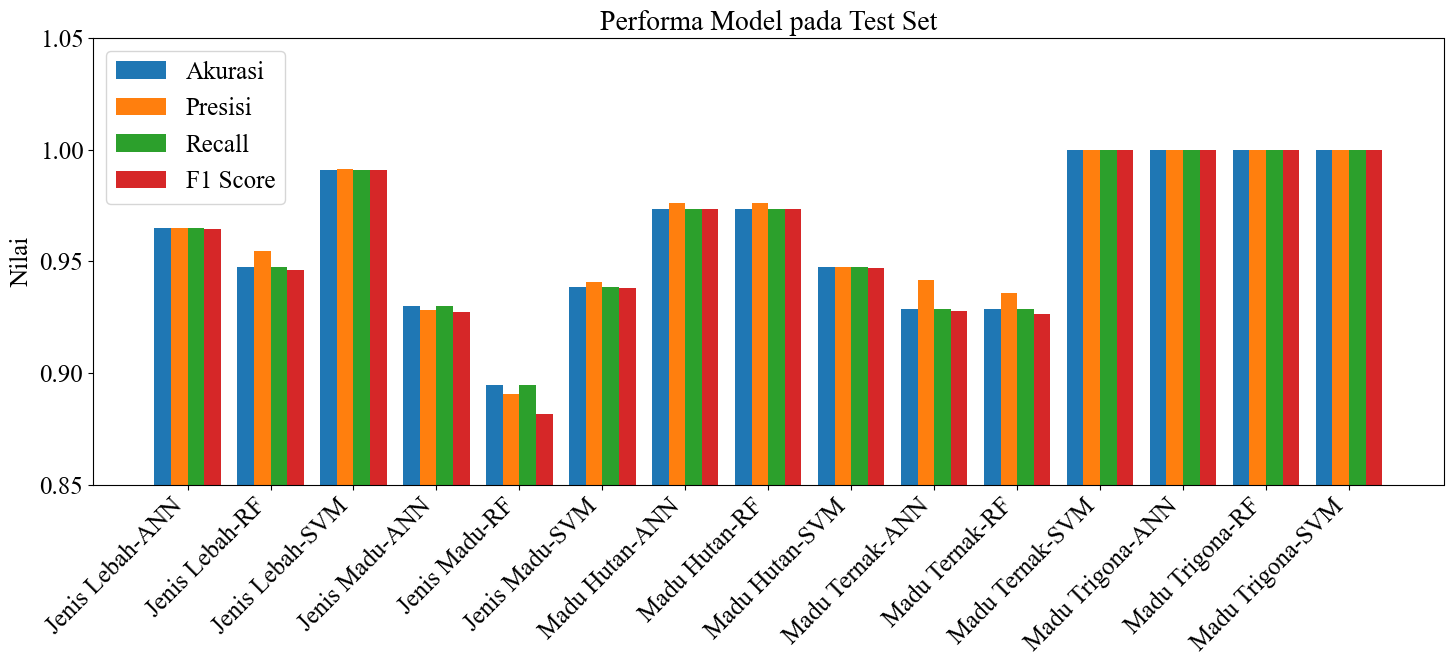

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk Test Set (dari tabel)
klasifikasi = [
    "Jenis Lebah", "Jenis Lebah", "Jenis Lebah",
    "Jenis Madu", "Jenis Madu", "Jenis Madu",
    "Madu Hutan", "Madu Hutan", "Madu Hutan",
    "Madu Ternak", "Madu Ternak", "Madu Ternak",
    "Madu Trigona", "Madu Trigona", "Madu Trigona"
]
model = ["ANN", "RF", "SVM"] * 5
A = [0.9649, 0.9474, 0.9912, 0.9298, 0.8947, 0.9386, 0.9737, 0.9737, 0.9474, 0.9286, 0.9286, 1.0, 1.0, 1.0, 1.0]
P = [0.9652, 0.9547, 0.9915, 0.9282, 0.8908, 0.9407, 0.9763, 0.9763, 0.9474, 0.9416, 0.9357, 1.0, 1.0, 1.0, 1.0]
R = [0.9649, 0.9474, 0.9912, 0.9298, 0.8947, 0.9386, 0.9737, 0.9737, 0.9474, 0.9286, 0.9286, 1.0, 1.0, 1.0, 1.0]
F1 = [0.9647, 0.9462, 0.9912, 0.9275, 0.8818, 0.9383, 0.9736, 0.9736, 0.9472, 0.9277, 0.9265, 1.0, 1.0, 1.0, 1.0]

labels = [
    "Jenis Lebah-ANN", "Jenis Lebah-RF", "Jenis Lebah-SVM",
    "Jenis Madu-ANN", "Jenis Madu-RF", "Jenis Madu-SVM",
    "Madu Hutan-ANN", "Madu Hutan-RF", "Madu Hutan-SVM",
    "Madu Ternak-ANN", "Madu Ternak-RF", "Madu Ternak-SVM",
    "Madu Trigona-ANN", "Madu Trigona-RF", "Madu Trigona-SVM"
]

x = np.arange(len(labels))  # posisi label di X
width = 0.2  # lebar bar

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - 1.5*width, A, width, label='Akurasi')
rects2 = ax.bar(x - 0.5*width, P, width, label='Presisi')
rects3 = ax.bar(x + 0.5*width, R, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, F1, width, label='F1 Score')

ax.set_ylabel('Nilai')
ax.set_title('Performa Model pada Test Set')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylim(0.85, 1.05)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = [
    "Jenis Lebah-ANN", "Jenis Lebah-RF", "Jenis Lebah-SVM",
    "Jenis Madu-ANN", "Jenis Madu-RF", "Jenis Madu-SVM",
    "Madu Hutan-ANN", "Madu Hutan-RF", "Madu Hutan-SVM",
    "Madu Ternak-ANN", "Madu Ternak-RF", "Madu Ternak-SVM",
    "Madu Trigona-ANN", "Madu Trigona-RF", "Madu Trigona-SVM"
]
A = [0.9649, 0.9474, 0.9912, 0.9298, 0.8947, 0.9386, 0.9737, 0.9737, 0.9474, 0.9286, 0.9286, 1.0, 1.0, 1.0, 1.0]
P = [0.9652, 0.9547, 0.9915, 0.9282, 0.8908, 0.9407, 0.9763, 0.9763, 0.9474, 0.9416, 0.9357, 1.0, 1.0, 1.0, 1.0]
R = [0.9649, 0.9474, 0.9912, 0.9298, 0.8947, 0.9386, 0.9737, 0.9737, 0.9474, 0.9286, 0.9286, 1.0, 1.0, 1.0, 1.0]
F1 = [0.9647, 0.9462, 0.9912, 0.9275, 0.8818, 0.9383, 0.9736, 0.9736, 0.9472, 0.9277, 0.9265, 1.0, 1.0, 1.0, 1.0]

x = np.arange(len(labels))

plt.figure(figsize=(15,7))
plt.plot(x, A, marker='o', label='Akurasi')
plt.plot(x, P, marker='s', label='Presisi')
plt.plot(x, R, marker='^', label='Recall')
plt.plot(x, F1, marker='d', label='F1 Score')

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylim(0.85, 1.05)
plt.ylabel('Nilai')
plt.title('Performa Model pada Test Set (Line Chart)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

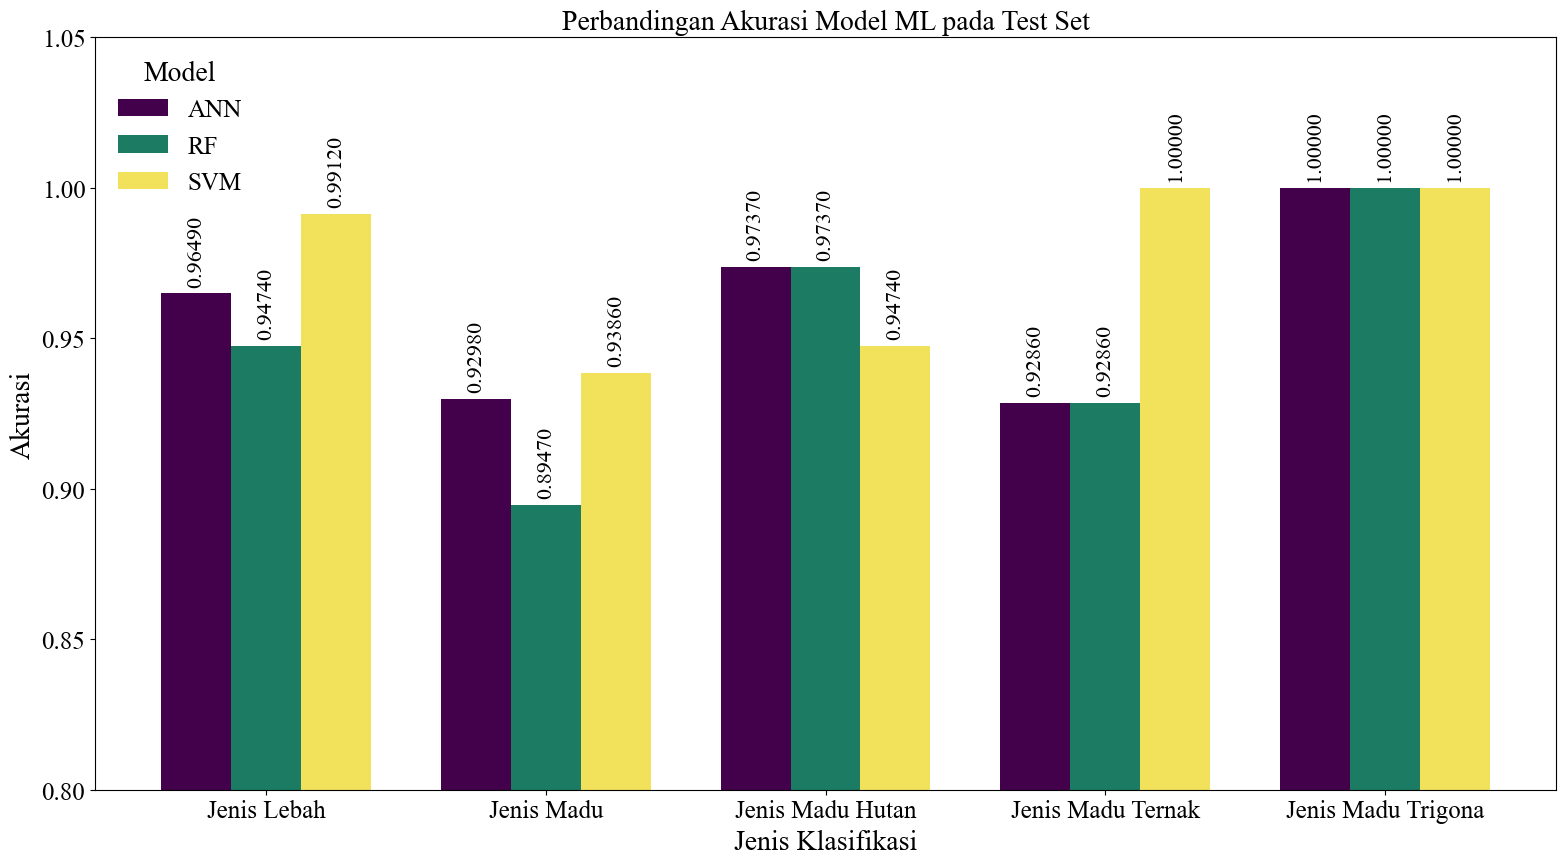

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Klasifikasi': [
        'Jenis Lebah', 'Jenis Lebah', 'Jenis Lebah',
        'Jenis Madu', 'Jenis Madu', 'Jenis Madu',
        'Jenis Madu Hutan', 'Jenis Madu Hutan', 'Jenis Madu Hutan',
        'Jenis Madu Ternak', 'Jenis Madu Ternak', 'Jenis Madu Ternak',
        'Jenis Madu Trigona', 'Jenis Madu Trigona', 'Jenis Madu Trigona'
    ],
    'Model': ['ANN', 'RF', 'SVM']*5,
    'Akurasi': [0.9649, 0.9474, 0.9912, 0.9298, 0.8947, 0.9386, 0.9737, 0.9737, 0.9474, 0.9286, 0.9286, 1.0, 1.0, 1.0, 1.0],
}

df = pd.DataFrame(data)

# Pivot data untuk group bar per klasifikasi
pivot = df.pivot(index='Klasifikasi', columns='Model', values='Akurasi')
labels = pivot.index.tolist()
x = np.arange(len(labels))
width = 0.25  # Lebar tiap bar

# Style sesuai gambar
# plt.style.use('default')
fig, ax = plt.subplots(figsize=(16,9))

# Custom colors agar sesuai gambar
colors = {
    'ANN': '#43014c',
    'RF': '#1b7b63',
    'SVM': '#f1e15b'
}

rects1 = ax.bar(x - width, pivot['ANN'], width, label='ANN', color=colors['ANN'])
rects2 = ax.bar(x,        pivot['RF'],  width, label='RF', color=colors['RF'])
rects3 = ax.bar(x + width, pivot['SVM'], width, label='SVM', color=colors['SVM'])

# Set fonts dan axis sesuai gambar
ax.set_ylabel('Akurasi', fontsize=20)
ax.set_xlabel('Jenis Klasifikasi', fontsize=20)
ax.set_title('Perbandingan Akurasi Model ML pada Test Set', fontsize=20, fontweight='normal')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=18)
ax.set_ylim(0.80, 1.05)
ax.legend(title='Model', loc='upper left', fontsize=18, title_fontsize=20, frameon=False)

# Grid mirip gambar
# ax.grid(axis='y', linestyle='-', linewidth=0.3, color='#aaa', alpha=0.5)
# ax.set_axisbelow(True)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# Tambahkan nilai di atas setiap bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=16, color='#000', rotation=90)

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()

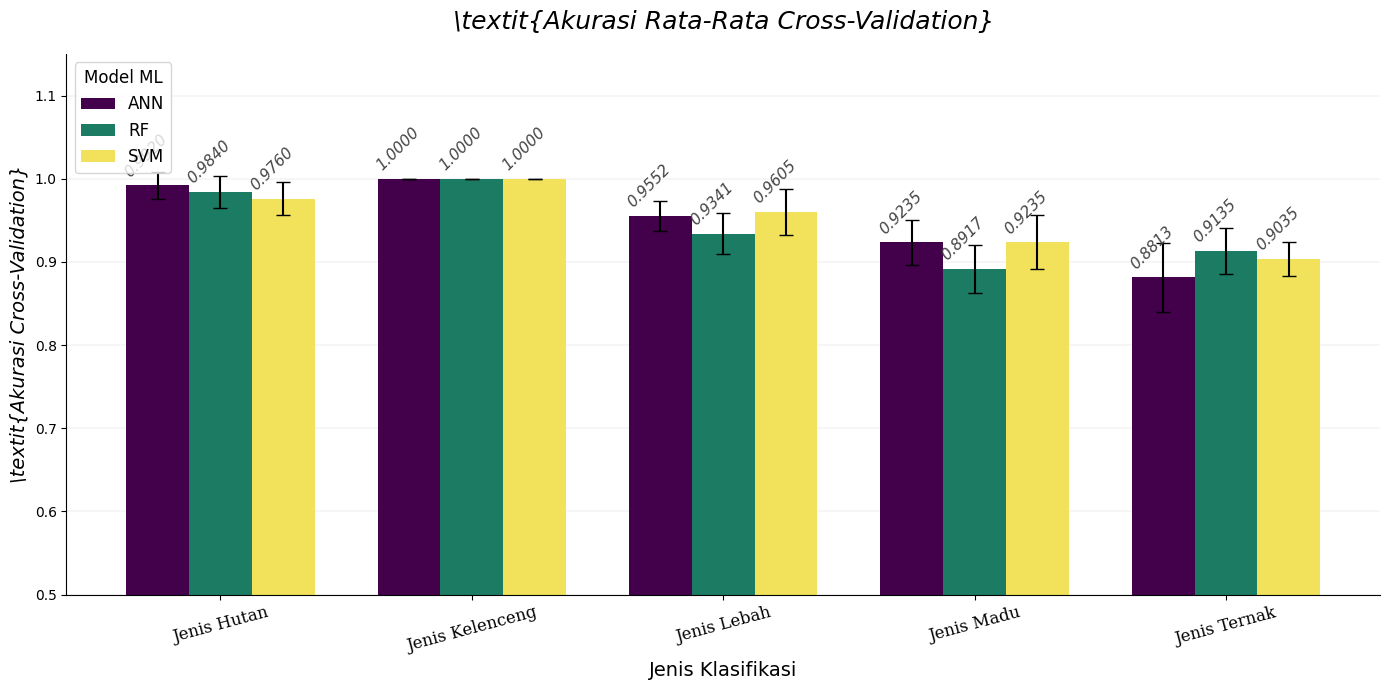

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data dari tabel (CV Accuracy dan CV Accuracy Std)
data = {
    "Klasifikasi": [
        "Lebah", "Lebah", "Lebah",
        "Madu", "Madu", "Madu",
        "Hutan", "Hutan", "Hutan",
        "Ternak", "Ternak", "Ternak",
        "Kelenceng", "Kelenceng", "Kelenceng"
    ],
    "Model": ["ANN", "RF", "SVM"] * 5,
    "CV Accuracy": [
        0.9552, 0.9341, 0.9605,
        0.9235, 0.8917, 0.9235,
        0.9920, 0.9840, 0.9760,
        0.8813, 0.9135, 0.9035,
        1.0000, 1.0000, 1.0000
    ],
    "CV Accuracy Std": [
        0.0178, 0.0249, 0.0276,
        0.0268, 0.0286, 0.0326,
        0.0160, 0.0196, 0.0196,
        0.0411, 0.0278, 0.0206,
        0.0000, 0.0000, 0.0000
    ],
}

df = pd.DataFrame(data)

# Pivot untuk group bar per klasifikasi
pivot = df.pivot(index="Klasifikasi", columns="Model", values="CV Accuracy")
pivot_std = df.pivot(index="Klasifikasi", columns="Model", values="CV Accuracy Std")
labels = pivot.index.tolist()
x = np.arange(len(labels))
width = 0.25

plt.style.use('default')
fig, ax = plt.subplots(figsize=(14,7))

# Custom color sesuai gambar
colors = {
    'ANN': '#43014c',
    'RF': '#1b7b63',
    'SVM': '#f1e15b'
}

# Plot bar dengan error bar
rects1 = ax.bar(x - width, pivot['ANN'], width, yerr=pivot_std['ANN'], label='ANN', color=colors['ANN'], capsize=5)
rects2 = ax.bar(x,        pivot['RF'],  width, yerr=pivot_std['RF'],  label='RF',  color=colors['RF'],  capsize=5)
rects3 = ax.bar(x + width, pivot['SVM'], width, yerr=pivot_std['SVM'], label='SVM', color=colors['SVM'], capsize=5)

# Set axis, label, style agar mirip gambar
ax.set_ylabel(r'\textit{Akurasi Cross-Validation}', fontsize=14, fontstyle='italic')
ax.set_xlabel('Jenis Klasifikasi', fontsize=14)
ax.set_title(r'\textit{Akurasi Rata-Rata Cross-Validation}', fontsize=18, fontstyle='italic', pad=18)
ax.set_xticks(x)
ax.set_xticklabels([f'Jenis {l}' for l in labels], rotation=15, fontsize=12, fontname='serif')
ax.set_ylim(0.5, 1.15)
ax.legend(title='Model ML', loc='upper left', fontsize=12, title_fontsize=12, frameon=True)

# Grid & border seperti gambar
ax.grid(axis='y', linestyle='-', linewidth=0.3, color='#aaa', alpha=0.5)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tambahkan nilai di atas setiap bar, miring & sedikit di atas bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-8, 4),  # offset (mirip gambar)
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, color='#444', rotation=45, fontstyle='italic')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()